# Business Case: OLA - Ensemble Learning


## Column Profiling:
1. MMMM-YY : Reporting Date (Monthly)
2. Driver_ID : Unique id for drivers
3. Age : Age of the driver
4. Gender : Gender of the driver – Male : 0, Female: 1
5. City : City Code of the driver
6. Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
7. Income : Monthly average Income of the driver
8. Date Of Joining : Joining date for the driver
9. LastWorkingDate : Last date of working for the driver
10. Joining Designation : Designation of the driver at the time of joining
11. Grade : Grade of the driver at the time of reporting
12. Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
13. Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

## Problem Statement:

* Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola.
* Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.
* As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly.
* Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.
* You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition.
* You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like
* Demographics (city, age, gender etc.)
* Tenure information (joining date, Last Date)
* Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

# Analysing basic metrics

In [1]:
#importing different libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import regex
import warnings 
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [2]:
#Loading of dataset
df = pd.read_csv("../scaler/ola_driver_scaler.csv")
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [3]:
print('No. of Rows in the dataset: ',df.shape[0])
print('No. of Columns in the dataset: ',df.shape[1])

No. of Rows in the dataset:  19104
No. of Columns in the dataset:  14


In [4]:
df.info() #to observe the data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


## Check for Duplicate Values

In [5]:
df.duplicated().sum()

0

* There are no duplicate instances in the data

In [6]:
# Check Missing Values
df.isna().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [8]:
df.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


## Non-Graphical Analysis

In [9]:
# since  unnamed and driver_id columns have the highest correlation and they are the same
# here, dropping unnamed column
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [10]:
# unique value Gender column(listed in %)
Gender = df['Gender'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
Gender.columns = ['Gender', 'Count']
Gender

,Gender,Count
0,0.0,58.13
1,1.0,41.87


In [11]:
# unique value City column(listed in %)
City = df['City'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
City.columns = ['City', 'Count']
City

,City,Count
0,C20,5.28
1,C29,4.71
2,C26,4.55
3,C22,4.23
4,C27,4.11
5,C15,3.98
6,C10,3.89
7,C12,3.81
8,C8,3.73
9,C16,3.71


In [12]:
# unique value Education_Level column(listed in %)
Education_Level = df['Education_Level'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
Education_Level.columns = ['Education_Level', 'Count']
Education_Level

,Education_Level,Count
0,1,35.93
1,2,33.12
2,0,30.95


In [13]:
# unique value Joining Designation column(listed in %)
JoiningDesignation = df['Joining Designation'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
JoiningDesignation.columns = ['Joining Designation', 'Count']
JoiningDesignation

,Joining Designation,Count
0,1,51.46
1,2,31.17
2,3,14.90
3,4,1.78
4,5,0.68


In [14]:
# unique value Grade column(listed in %)
Grade = df['Grade'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
Grade.columns = ['Grade', 'Count']
Grade

,Grade,Count
0,2,34.69
1,1,27.23
2,3,25.26
3,4,11.22
4,5,1.60


In [15]:
# unique value Quarterly Rating column(listed in %)
QuarterlyRating = df['Quarterly Rating'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
QuarterlyRating.columns = ['Quarterly Rating', 'Count']
QuarterlyRating

,Quarterly Rating,Count
0,1,40.20
1,2,29.07
2,3,20.39
3,4,10.35


In [16]:
# Number of unique values in all columns
unique_num = ['MMM-YY','Driver_ID','Age','Gender','City','Education_Level','Income','Dateofjoining','LastWorkingDate','Joining Designation','Grade','Total Business Value','Quarterly Rating']
for col in unique_num:
  print(f"No. of unique values in {col}: {df[col].nunique()}")

No. of unique values in MMM-YY: 24
No. of unique values in Driver_ID: 2381
No. of unique values in Age: 36
No. of unique values in Gender: 2
No. of unique values in City: 29
No. of unique values in Education_Level: 3
No. of unique values in Income: 2383
No. of unique values in Dateofjoining: 869
No. of unique values in LastWorkingDate: 493
No. of unique values in Joining Designation: 5
No. of unique values in Grade: 5
No. of unique values in Total Business Value: 10181
No. of unique values in Quarterly Rating: 4


In [17]:
df.describe().loc[['min', 'max']]

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
min,1.0,21.0,0.0,0.0,10747.0,1.0,1.0,-6000000.0,1.0
max,2788.0,58.0,1.0,2.0,188418.0,5.0,5.0,33747720.0,4.0


## Data Pre-Processing and Feature Engineering

In [18]:
# Target variable creation: Create a column called target which tells whether the driver has left the company-
# driver whose last working day is present will have the value 1
first = (df.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()
first['LastWorkingDate'].replace({True:1,False:0},inplace=True)
first.rename(columns={'LastWorkingDate':'target'},inplace=True)
first.head()

,Driver_ID,target
0,1,0
1,2,1
2,4,0
3,5,0
4,6,1


In [19]:
# Create a column which tells whether the quarterly rating has increased for that driver -
# for those whose quarterly rating has increased we assign the value 1
QR1 =  (df.groupby('Driver_ID').agg({'Quarterly Rating':'first'})['Quarterly Rating']).reset_index()
QR2 = (df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating']).reset_index()

In [20]:
QR1.shape,QR2.shape

((2381, 2), (2381, 2))

In [21]:
QR1.isna().sum()

Driver_ID           0
Quarterly Rating    0
dtype: int64

In [22]:
QR2.isna().sum()

Driver_ID           0
Quarterly Rating    0
dtype: int64

In [23]:
first = first.merge(QR1,on='Driver_ID')
first = first.merge(QR2,on='Driver_ID')

In [24]:
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y
0,1,0,2,2
1,2,1,1,1
2,4,0,1,1
3,5,0,1,1
4,6,1,1,2


In [25]:
first['Promotion'] = np.where(first['Quarterly Rating_x'] == first['Quarterly Rating_y'], 0,1)

In [26]:
first

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion
0,1,0,2,2,0
1,2,1,1,1,0
2,4,0,1,1,0
3,5,0,1,1,0
4,6,1,1,2,1
...,...,...,...,...,...
2376,2784,1,3,4,1
2377,2785,0,1,1,0
2378,2786,0,2,1,1
2379,2787,0,2,1,1


In [27]:
# Create a column which tells whether the monthly income has increased for that driver -
# for those whose monthly income has increased we assign the value 1
incm1 =  (df.groupby('Driver_ID').agg({'Income':'first'})['Income']).reset_index()
incm2 = (df.groupby('Driver_ID').agg({'Income':'last'})['Income']).reset_index()

In [28]:
incm1.shape,incm2.shape

((2381, 2), (2381, 2))

In [29]:
incm1.isna().sum()

Driver_ID    0
Income       0
dtype: int64

In [30]:
incm2.isna().sum()

Driver_ID    0
Income       0
dtype: int64

In [31]:
first = first.merge(incm1,on='Driver_ID')
first = first.merge(incm2,on='Driver_ID')

In [32]:
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y
0,1,0,2,2,0,57387,57387
1,2,1,1,1,0,67016,67016
2,4,0,1,1,0,65603,65603
3,5,0,1,1,0,46368,46368
4,6,1,1,2,1,78728,78728


In [33]:
first['Raise'] = np.where(first['Income_x'] == first['Income_y'], 0,1)

In [34]:
first

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y,Raise
0,1,0,2,2,0,57387,57387,0
1,2,1,1,1,0,67016,67016,0
2,4,0,1,1,0,65603,65603,0
3,5,0,1,1,0,46368,46368,0
4,6,1,1,2,1,78728,78728,0
...,...,...,...,...,...,...,...,...
2376,2784,1,3,4,1,82815,82815,0
2377,2785,0,1,1,0,12105,12105,0
2378,2786,0,2,1,1,35370,35370,0
2379,2787,0,2,1,1,69498,69498,0


In [35]:
first = first[['Driver_ID','target','Raise','Promotion']]

In [36]:
first.head()

,Driver_ID,target,Raise,Promotion
0,1,0,0,0
1,2,1,0,0
2,4,0,0,0
3,5,0,0,0
4,6,1,0,1


In [37]:
functions = {'MMM-YY':'count',
             'Driver_ID':'first',
             'Age':'max',
             'Gender':'last',
            'City':'last',
             'Education_Level':'last',
             'Dateofjoining':'first',
            'LastWorkingDate':'last',
             'Grade':'last',
             'Total Business Value':'sum',
            'Income':'sum',
             'Dateofjoining':'first',
             'LastWorkingDate':'last',
            'Joining Designation':'last',
             'Grade':'last',
             'Quarterly Rating':'first'}
df = df.groupby([df[f'Driver_ID']]).aggregate(functions)
df['month'] = pd.to_datetime(df['Dateofjoining']).dt.month
df['year'] = pd.DatetimeIndex(df['Dateofjoining']).year
df.rename(columns={'MMM-YY':'Reportings'},inplace=True)

In [38]:
df.reset_index(drop=True, inplace=True)
df = df.merge(first,on='Driver_ID')
df.head()

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Raise,Promotion
0,3,1,28.0,0.0,C23,2,24/12/18,03/11/19,1,1715580,172161,1,2,12,2018,0,0,0
1,2,2,31.0,0.0,C7,2,11/06/20,None,2,0,134032,2,1,11,2020,1,0,0
2,5,4,43.0,0.0,C13,2,12/07/19,27/04/20,2,350000,328015,2,1,12,2019,0,0,0
3,3,5,29.0,0.0,C9,0,01/09/19,03/07/19,1,120360,139104,1,1,1,2019,0,0,0
4,5,6,31.0,1.0,C11,1,31/07/20,None,3,1265000,393640,3,1,7,2020,1,0,1


In [39]:
df['Age'] = df['Age'].astype('int64')
df['Cities'] =df['City'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reportings            2381 non-null   int64  
 1   Driver_ID             2381 non-null   int64  
 2   Age                   2381 non-null   int64  
 3   Gender                2381 non-null   float64
 4   City                  2381 non-null   object 
 5   Education_Level       2381 non-null   int64  
 6   Dateofjoining         2381 non-null   object 
 7   LastWorkingDate       1616 non-null   object 
 8   Grade                 2381 non-null   int64  
 9   Total Business Value  2381 non-null   int64  
 10  Income                2381 non-null   int64  
 11  Joining Designation   2381 non-null   int64  
 12  Quarterly Rating      2381 non-null   int64  
 13  month                 2381 non-null   int64  
 14  year                  2381 non-null   int64  
 15  target               

In [41]:
df.drop(columns=['Dateofjoining','LastWorkingDate','City'],axis=1,inplace=True)
df['Gender'].replace({'M':0,'F':1},inplace=True)
df['Gender'] = df['Gender'].astype('int64')

In [42]:
df.head()

,Reportings,Driver_ID,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Raise,Promotion,Cities
0,3,1,28,0,2,1,1715580,172161,1,2,12,2018,0,0,0,23
1,2,2,31,0,2,2,0,134032,2,1,11,2020,1,0,0,7
2,5,4,43,0,2,2,350000,328015,2,1,12,2019,0,0,0,13
3,3,5,29,0,0,1,120360,139104,1,1,1,2019,0,0,0,9
4,5,6,31,1,1,3,1265000,393640,3,1,7,2020,1,0,1,11


In [43]:
df.isna().sum()

Reportings              0
Driver_ID               0
Age                     0
Gender                  0
Education_Level         0
Grade                   0
Total Business Value    0
Income                  0
Joining Designation     0
Quarterly Rating        0
month                   0
year                    0
target                  0
Raise                   0
Promotion               0
Cities                  0
dtype: int64

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,2381.0,8.023520e+00,6.783590e+00,1.0,3.0,5.0,10.0,24.0
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,2381.0,1.486350e+00,8.343483e-01,1.0,1.0,1.0,2.0,4.0


## Univariate Analysis

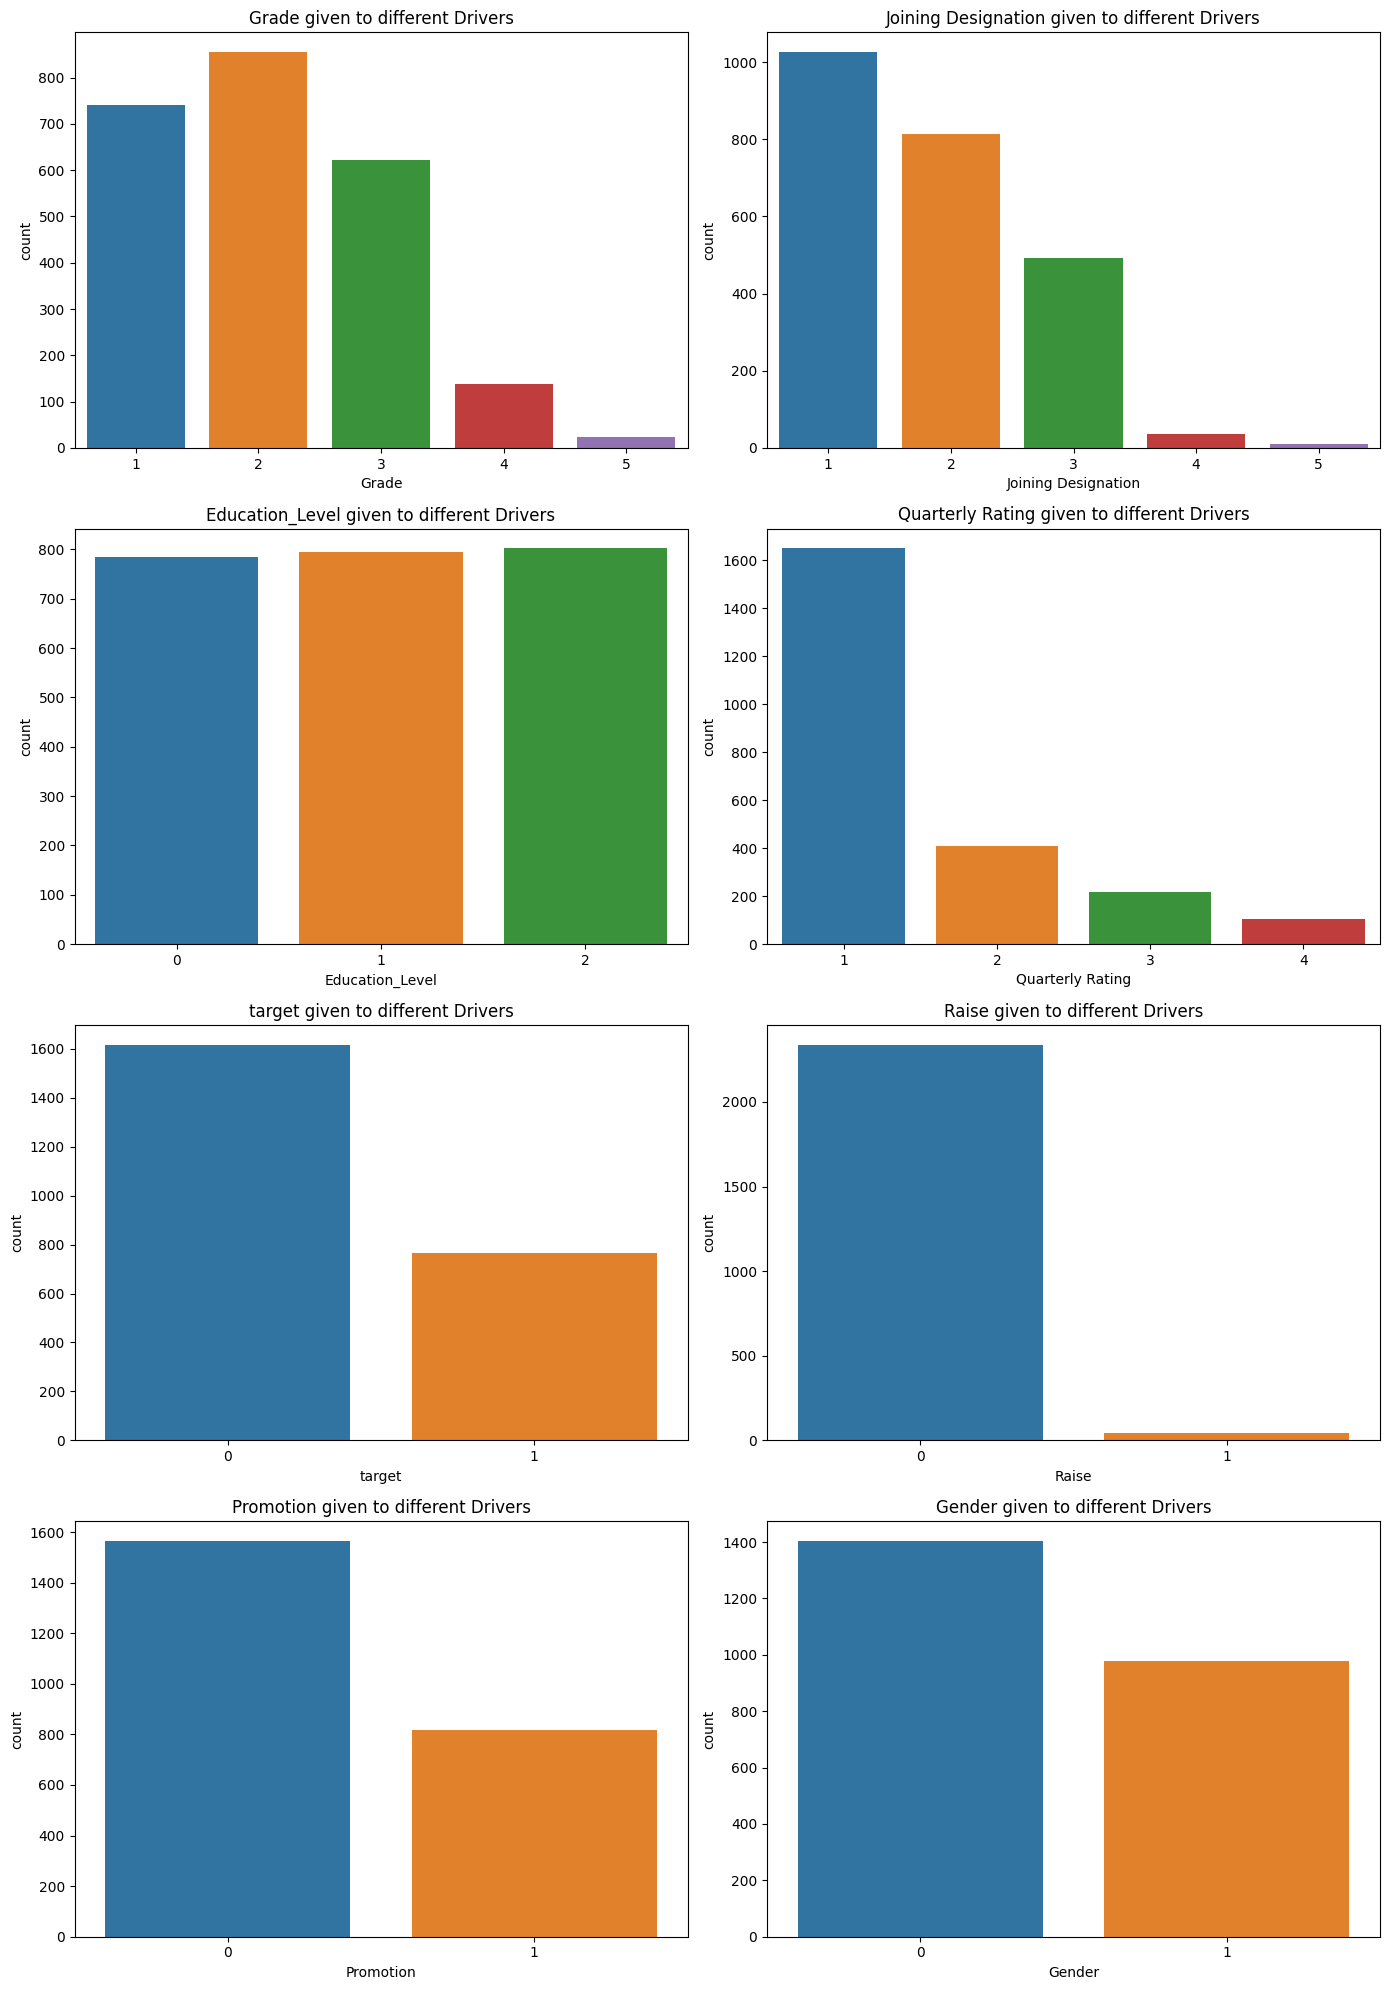

In [45]:
plot = ['Grade','Joining Designation', 'Education_Level' , 'Quarterly Rating', 'target','Raise','Promotion', 'Gender']

plt.figure(figsize=(14,20))
i=1
for col in plot:
  ax=plt.subplot(4,2,i)
  sns.countplot(x=df[col])
  plt.title(f'{col} given to different Drivers')
  i += 1

plt.tight_layout()
plt.show()

**Conclusion:**
* Male drivers constitute 58.9% of the total driver population.
* There are three education levels among drivers, all of which have nearly equal distributions within the driver community.
* The most frequent grade attained by drivers is Grade 2, with a declining count as the grade level increases.   

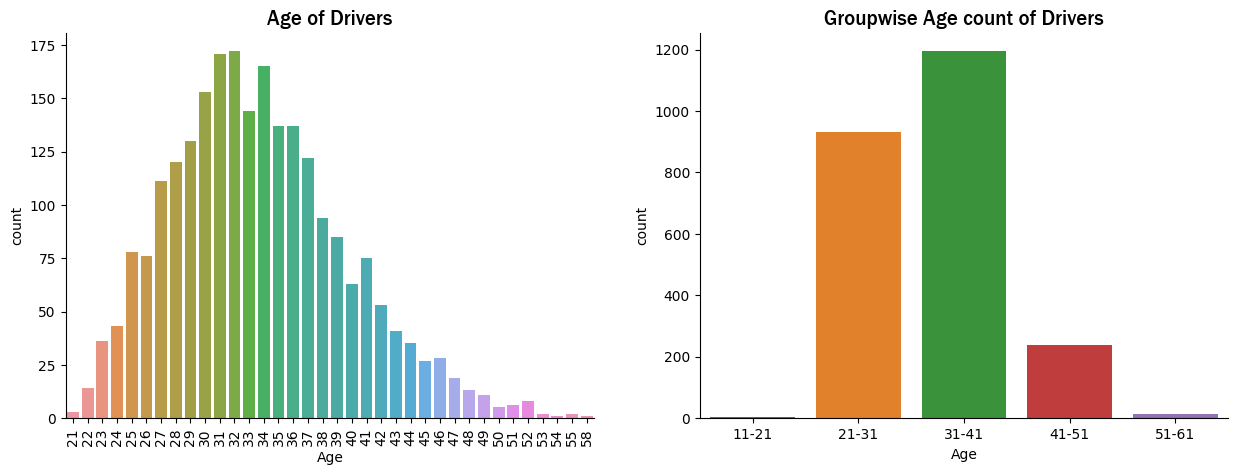

In [46]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
sns.countplot(x=df.Age,width=0.8)
plt.title('Age of Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
a = pd.cut(df.Age,bins=[11,21,31,41,51,61],labels=['11-21','21-31','31-41','41-51','51-61'])
sns.countplot(x=a)
plt.title('Groupwise Age count of Drivers',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

**Conclusion:**
* The majority of drivers fall between 21 and 58 years old, with 32 years being the most common age. Specifically, the peak number of drivers occurs within the age range of 31 to 41 years.

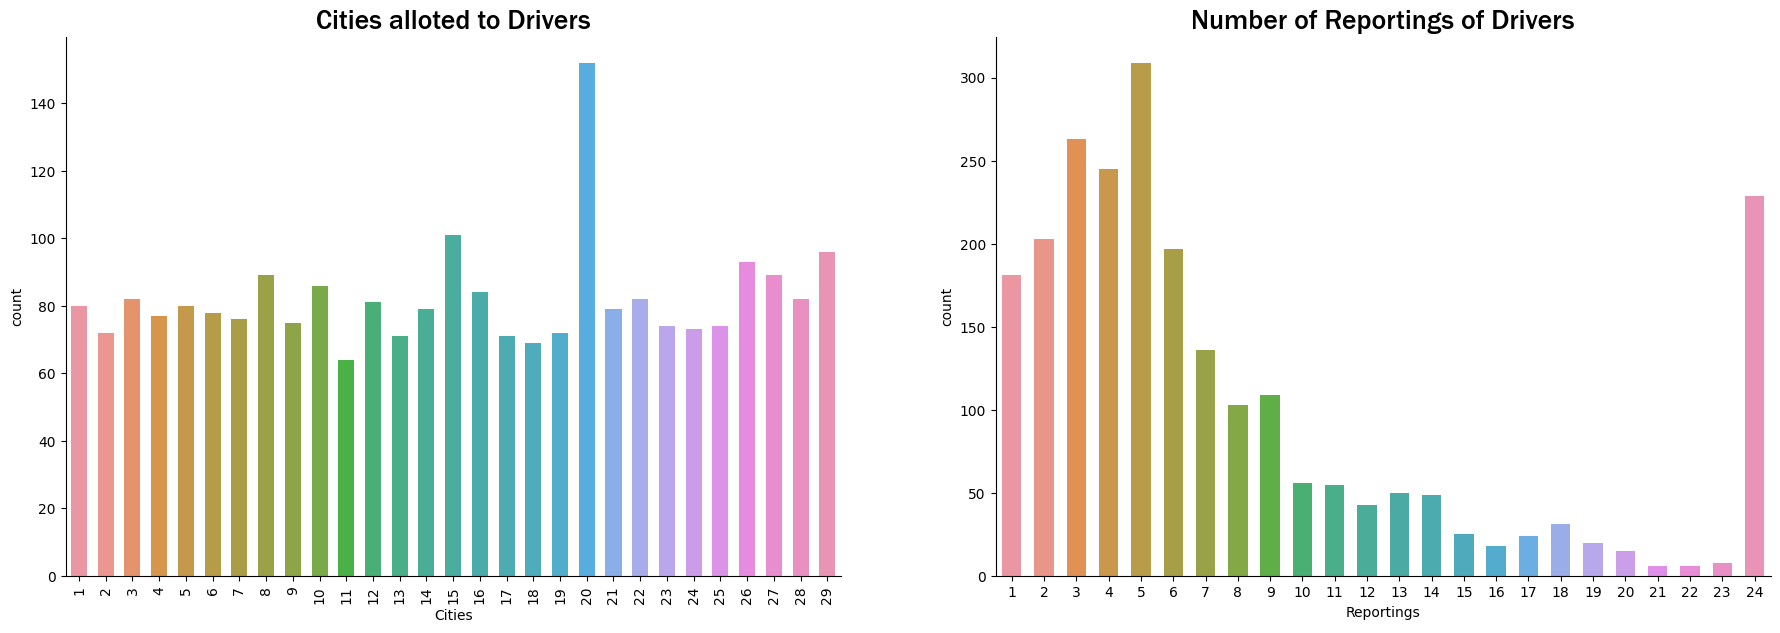

In [47]:
fig = plt.figure(figsize=(22,7))
ax = fig.add_subplot(121)
sns.countplot(x=df.Cities,width=0.6)
plt.title('Cities alloted to Drivers',fontname='Franklin Gothic Medium', fontsize=20)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
sns.countplot(x=df.Reportings,width=0.6)
plt.title('Number of Reportings of Drivers',fontname='Franklin Gothic Medium', fontsize=20)
sns.despine()
plt.show()

**Conclusion:**
* The highest number of drivers prefer City C20 over other locations.
* Majority number of reportings of drivers prefer R6 over other number of reportings.

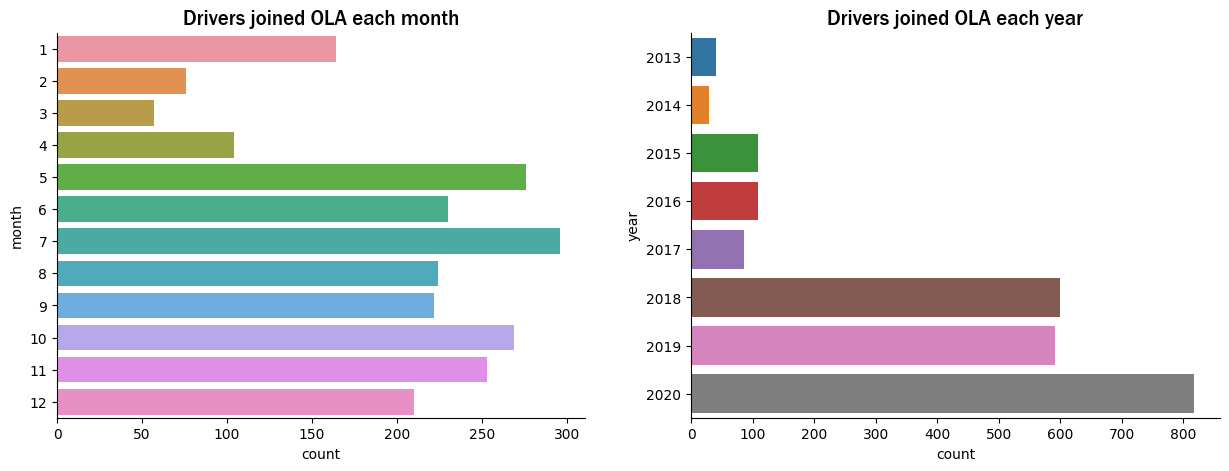

In [48]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
sns.countplot(y=df.month)
plt.title('Drivers joined OLA each month',fontname='Franklin Gothic Medium', fontsize=15)

ax = fig.add_subplot(1,2,2)
sns.countplot(y=df.year)
plt.title('Drivers joined OLA each year',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

**Conclusion:**
* July received the maximum number of drivers in 8 years.
* February and March receives the least number of Drivers joining OLA.
* Joining of Drivers receives a boost of about 500% after 2017.

## Outlier Detection

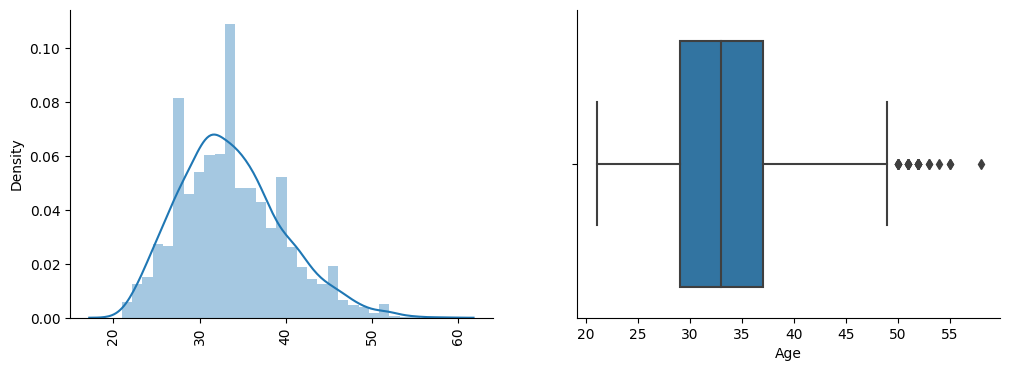

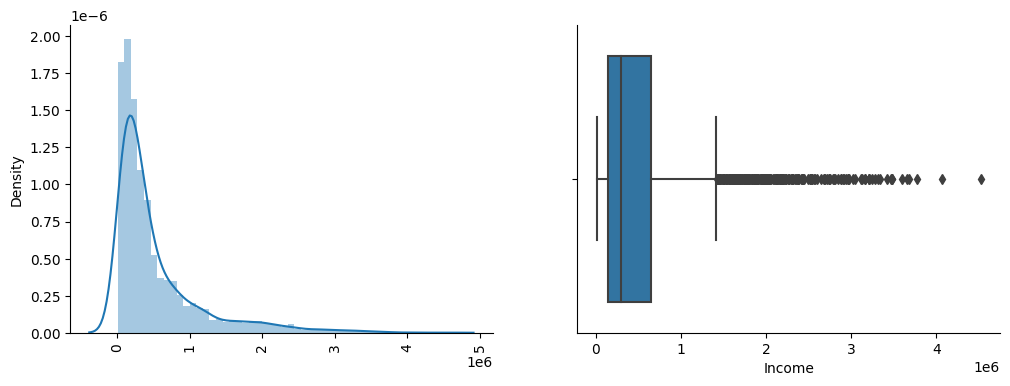

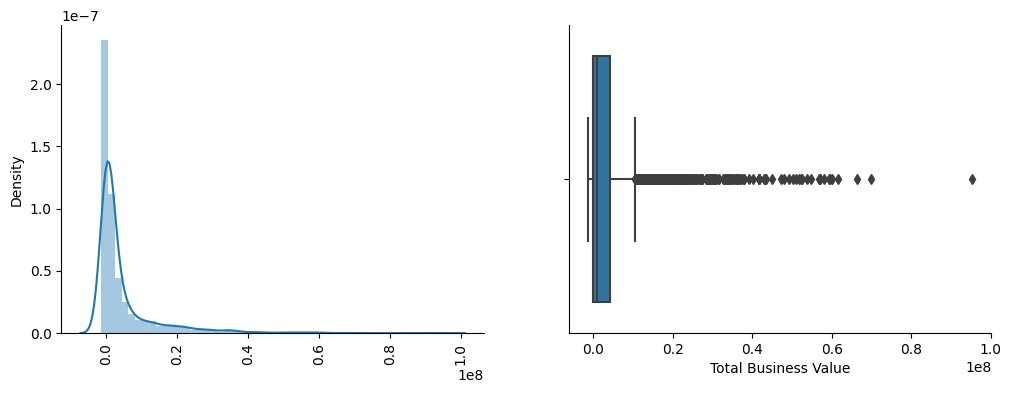

In [49]:
num_vars = df[['Age','Income','Total Business Value']]
for i in num_vars:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.distplot(x=df[i])
    plt.title('')
    plt.xticks(rotation=90)

    plt.subplot(122)
    sns.boxplot(x=df[i])
    plt.title('')
    sns.despine()
    plt.show()

* Most of the distribution is highly skewed which tells us that they might contain outliers
* Almost all the continuous features have outliers present in the dataset.

## Outlier Treatment

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,2381.0,8.023520e+00,6.783590e+00,1.0,3.0,5.0,10.0,24.0
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,2381.0,1.486350e+00,8.343483e-01,1.0,1.0,1.0,2.0,4.0


In [51]:
len(df[df['Total Business Value'] < 1])

729

* The Total Business Value column contains negative values, which we identify as outliers potentially influencing our machine learning model's outcomes.

* Focusing on segments of the dataset where Total Business Value exceeds 1, we observe outliers in the data that fall below this threshold, potentially affecting our model's accuracy.

* Specifically, among the dataset sections with Total Business Value greater than 1, we find precisely 729 drivers with values lower than 1, indicating a subset prone to outlier effects.

In [52]:
df= df[df['Total Business Value'] > 1]

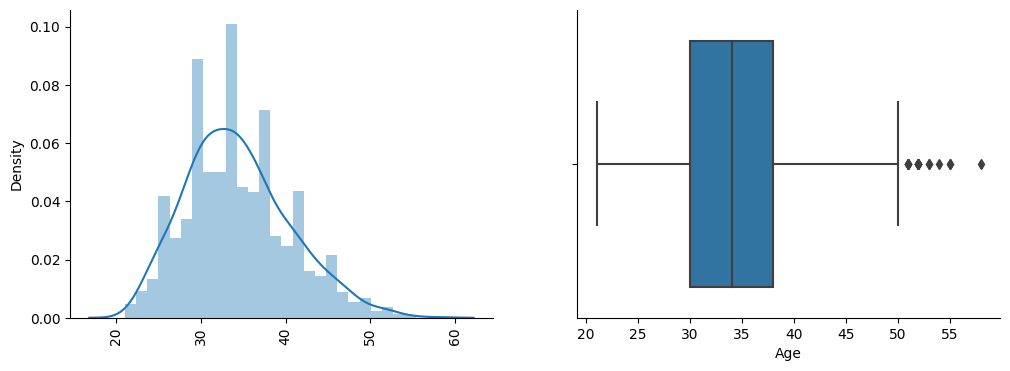

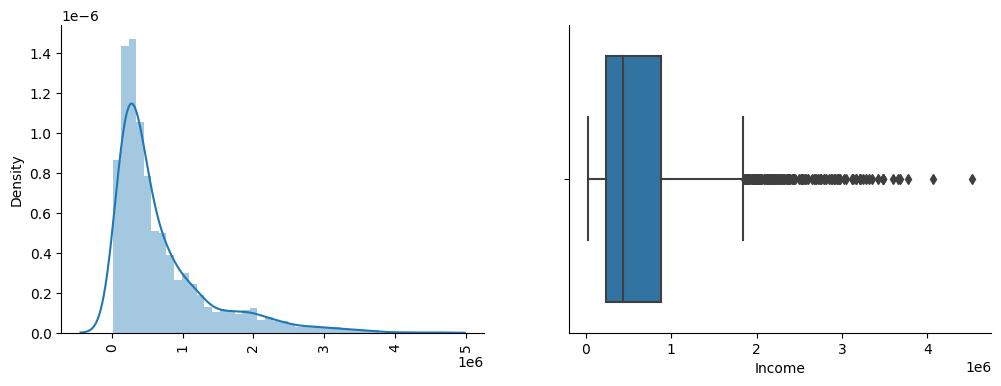

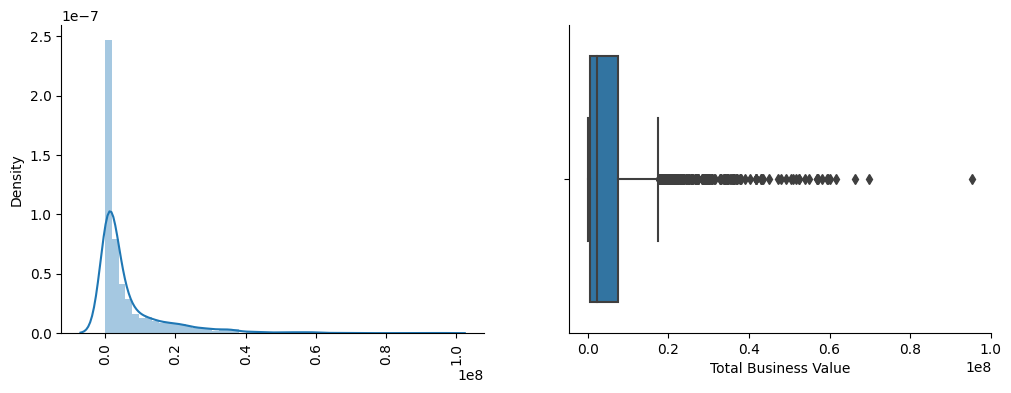

In [53]:
num_vars = df[['Age','Income','Total Business Value']]
for i in num_vars:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.distplot(x=df[i])
    plt.xticks(rotation=90)

    plt.subplot(122)
    sns.boxplot(x=df[i])
    sns.despine()
    plt.show()

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,1652.0,1.026998e+01,6.967589e+00,1.0,5.0,8.0,14.0,24.0
Driver_ID,1652.0,1.390315e+03,8.082919e+02,1.0,679.5,1385.0,2097.0,2788.0
Age,1652.0,3.432385e+01,6.190776e+00,21.0,30.0,34.0,38.0,58.0
Gender,1652.0,4.158596e-01,4.930188e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,1652.0,1.030872e+00,8.093284e-01,0.0,0.0,1.0,2.0,2.0
Grade,1652.0,2.144068e+00,9.719606e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,1652.0,6.613094e+06,1.032794e+07,19580.0,663022.5,2242080.0,7418392.5,95331060.0
Income,1652.0,6.864932e+05,6.814522e+05,20886.0,236652.5,428960.0,877151.0,4522032.0
Joining Designation,1652.0,1.759685e+00,8.395129e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,1652.0,1.700363e+00,9.237035e-01,1.0,1.0,1.0,2.0,4.0


## Bivariate Analysis & Multivariate Analysis

In [55]:
grouped_gender = df.groupby('Gender')['Income'].sum().reset_index()
grouped_education = df.groupby('Education_Level')['Income'].sum().reset_index()
grouped_grade = df.groupby('Grade')['Income'].sum().reset_index()
grouped_desig = df.groupby('Joining Designation')['Income'].sum().reset_index()
grouped_QR = df.groupby('Quarterly Rating')['Income'].sum().reset_index()
grouped_target = df.groupby('target')['Income'].sum().reset_index()
grouped_raise = df.groupby('Raise')['Income'].sum().reset_index()
grouped_promote = df.groupby('Promotion')['Income'].sum().reset_index()

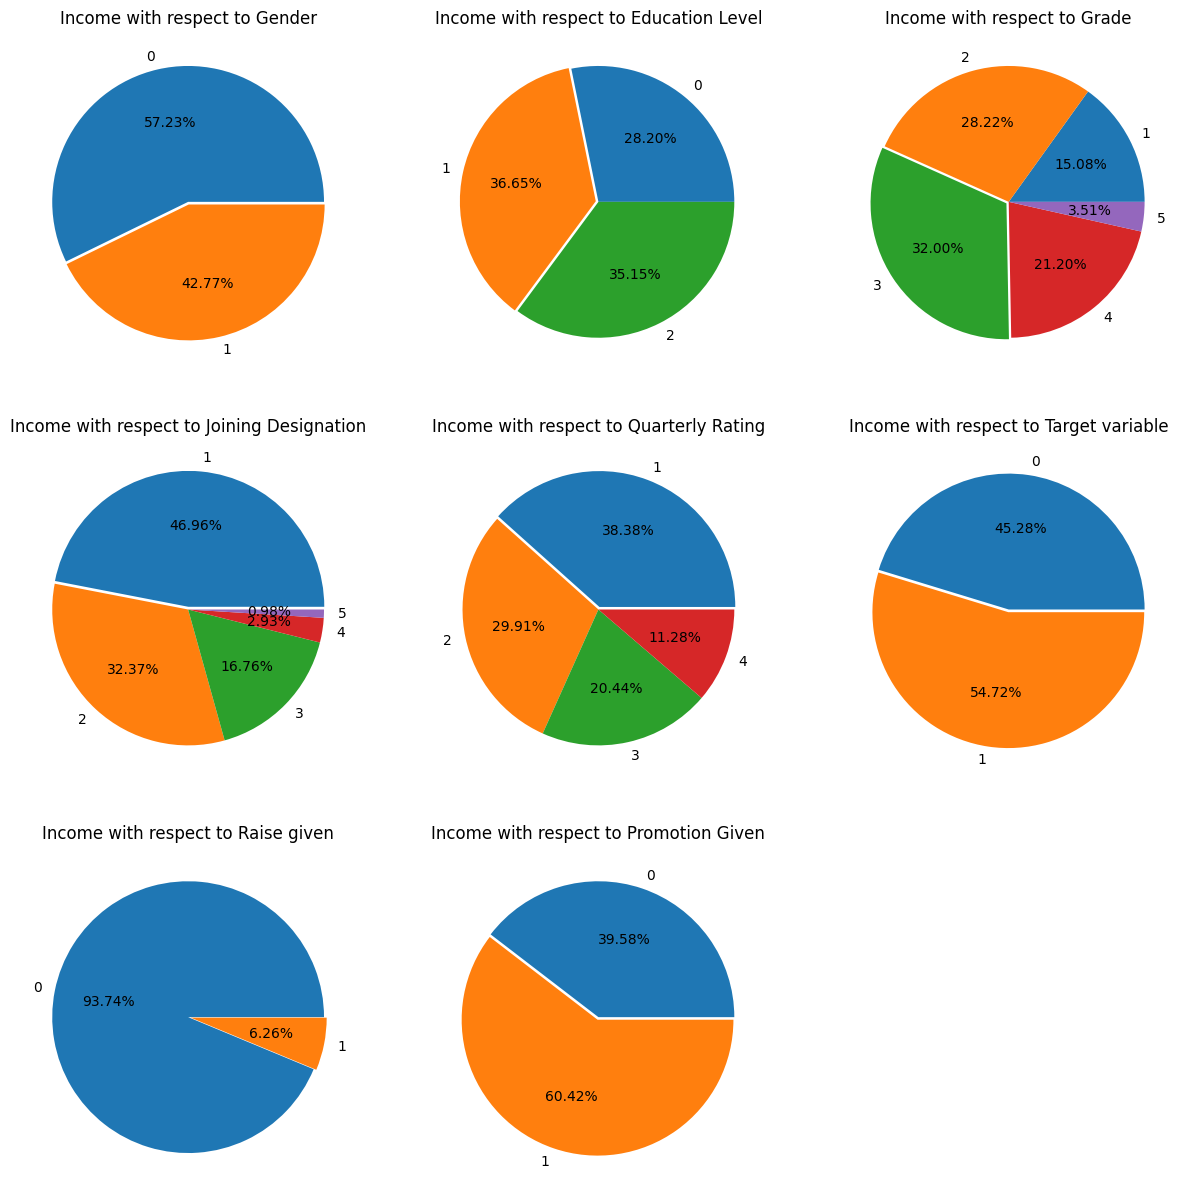

In [56]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.pie(grouped_gender['Income'], labels=grouped_gender['Gender'], explode = [0,0.02],  autopct = '%.2f%%')
plt.title('Income with respect to Gender')

plt.subplot(3,3,2)
plt.pie(grouped_education['Income'], labels=grouped_education['Education_Level'], explode = [0,0.02,0],  autopct = '%.2f%%')
plt.title('Income with respect to Education Level')

plt.subplot(3,3,3)
plt.pie(grouped_grade['Income'], labels=grouped_grade['Grade'], explode = [0,0,0.02,0,0], autopct = '%.2f%%')
plt.title('Income with respect to Grade')

plt.subplot(3,3,4)
plt.pie(grouped_desig['Income'], labels=grouped_desig['Joining Designation'], explode = [0.02,0,0,0,0], autopct = '%.2f%%')
plt.title('Income with respect to Joining Designation')

plt.subplot(3,3,5)
plt.pie(grouped_QR['Income'], labels=grouped_QR['Quarterly Rating'], explode = [0.02,0,0,0], autopct = '%.2f%%')
plt.title('Income with respect to Quarterly Rating')

plt.subplot(3,3,6)
plt.pie(grouped_target['Income'], labels=grouped_target['target'], explode = [0,0.02],  autopct = '%.2f%%')
plt.title('Income with respect to Target variable')

plt.subplot(3,3,7)
plt.pie(grouped_raise['Income'], labels=grouped_raise['Raise'], explode = [0,0.02],  autopct = '%.2f%%')
plt.title('Income with respect to Raise given')

plt.subplot(3,3,8)
plt.pie(grouped_promote['Income'], labels=grouped_promote['Promotion'], explode = [0,0.02],  autopct = '%.2f%%')
plt.title('Income with respect to Promotion Given')

sns.despine()
plt.show()

**Conclusion:**
* So we see that there are 57% male employees and 43% female employees.
* The percentages of employees with different education levels are almost same for level 1 & 2.
* 97.3% of the employees who did not get a raise.
* Almost 43% of the employees joined at lowest designation 1. 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.
* Only 54.6% of the employees received a promotion, while 45.4% did not. However, only 5.7% received a raise in income.

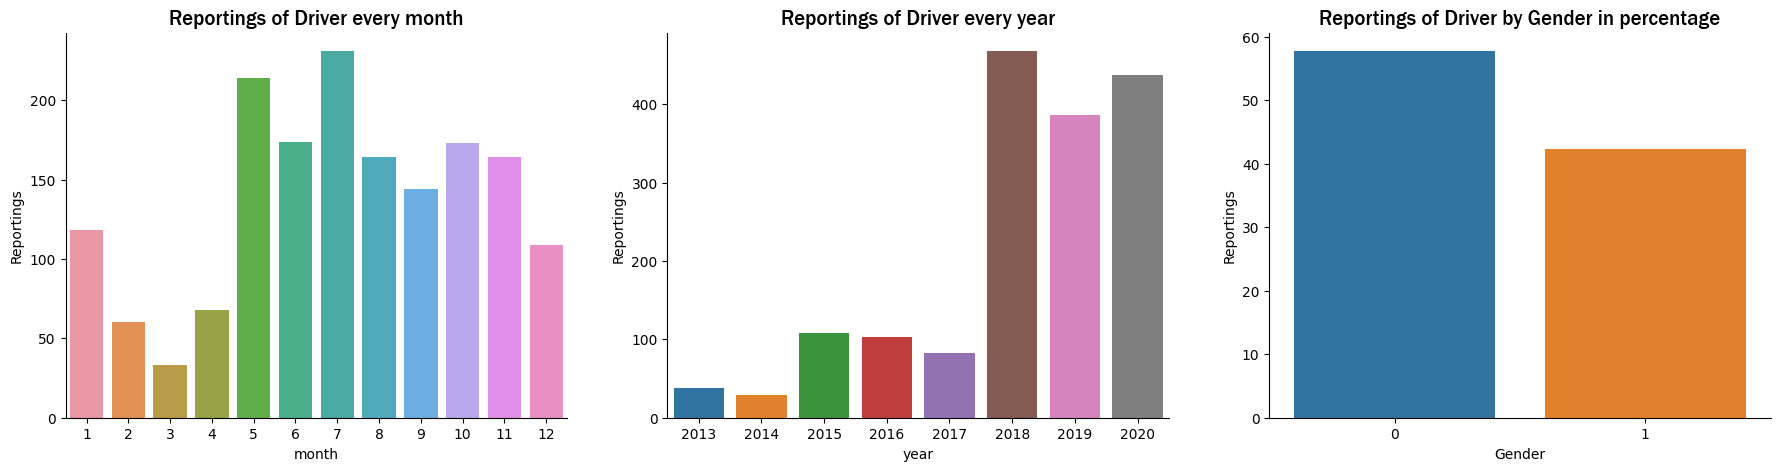

In [57]:
fig = plt.figure(figsize=(22,5))
ax = fig.add_subplot(1,3,1)
grouped_months = df.groupby(['month'])['Reportings'].count().reset_index()
sns.barplot(data=grouped_months,x='month',y='Reportings')
plt.title('Reportings of Driver every month',fontname='Franklin Gothic Medium', fontsize=15)

ax = fig.add_subplot(1,3,2)
grouped_years = df.groupby(['year'])['Reportings'].count().reset_index()
sns.barplot(x='year', y='Reportings', data=grouped_years)
plt.title('Reportings of Driver every year',fontname='Franklin Gothic Medium', fontsize=15)

ax = fig.add_subplot(1,3,3)
grouped_gender = df.groupby('Gender')['Reportings'].sum().reset_index()
grouped_gender['Reportings'] =(grouped_gender['Reportings']/sum(df.Reportings)*100).round(2)
sns.barplot(x=grouped_gender['Gender'],y= grouped_gender['Reportings'])
plt.title('Reportings of Driver by Gender in percentage',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

**Conclusion:**
* Number of employees has been increase with increase in year as well as number of reportings.
* The number of male employees found in reporting is more than women employees.

In [58]:
grouped_months

,month,Reportings
0,1,118
1,2,60
2,3,33
3,4,68
4,5,214
5,6,174
6,7,231
7,8,164
8,9,144
9,10,173


In [59]:
grouped_years

,year,Reportings
0,2013,38
1,2014,29
2,2015,108
3,2016,103
4,2017,82
5,2018,468
6,2019,387
7,2020,437


In [60]:
grouped_gender

,Gender,Reportings
0,0,57.74
1,1,42.26


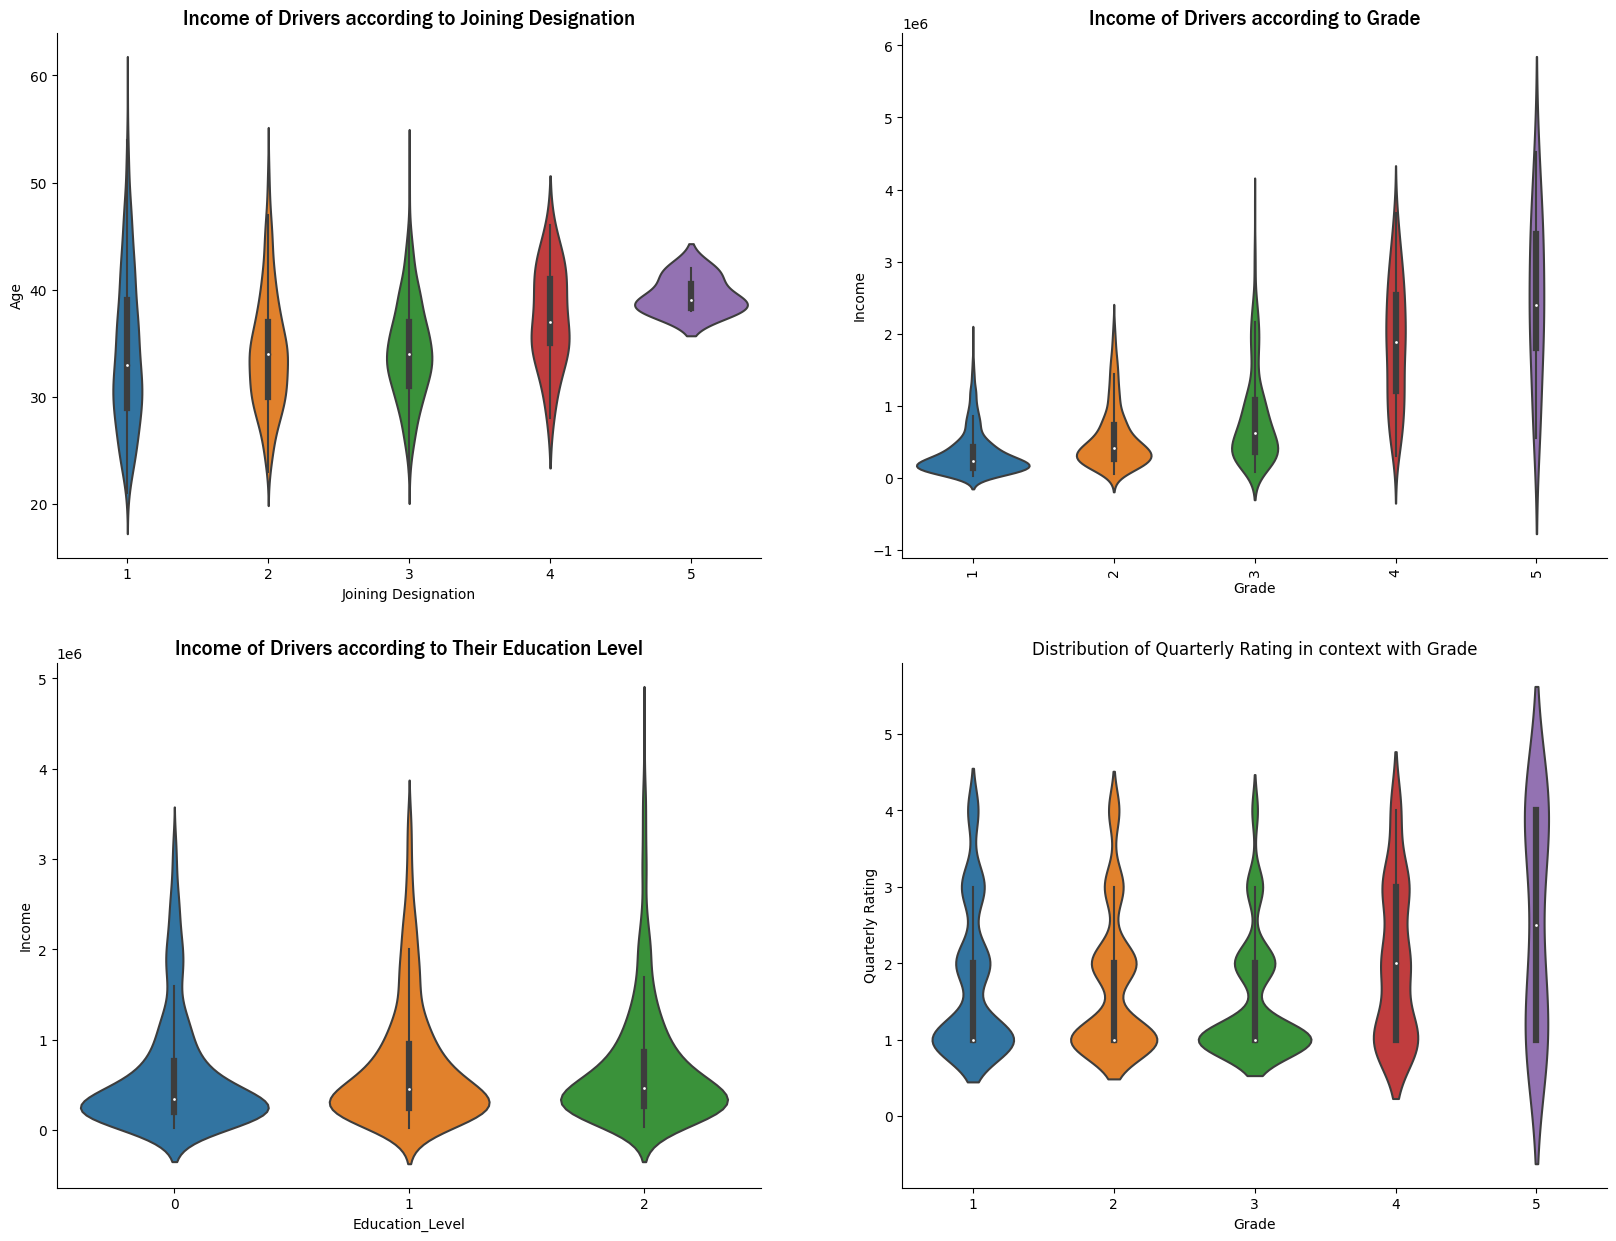

In [61]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.violinplot(y=df.Age,x=df['Joining Designation'])
plt.title('Income of Drivers according to Joining Designation',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(2,2,2)
sns.violinplot(x=df.Grade,y=df.Income)
plt.title('Income of Drivers according to Grade',fontname='Franklin Gothic Medium', fontsize=15)
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.violinplot(x=df.Education_Level,y=df.Income)
plt.title('Income of Drivers according to Their Education Level',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(2,2,4)
sns.violinplot(x=df['Grade'],y=df["Quarterly Rating"])
plt.title('Distribution of Quarterly Rating in context with Grade')
sns.despine()
sns.despine()
plt.show()

**Conclusion:**
* Income decreses with increase in Destination as about 4% of the employees hold higher designations.
* The median of the Income for employees having higher Grades is greater.
* Distribution of Income for employes at different Education level is about a change of 3-5% with level 0.
* Joining Designation Increases with increase in Grade.

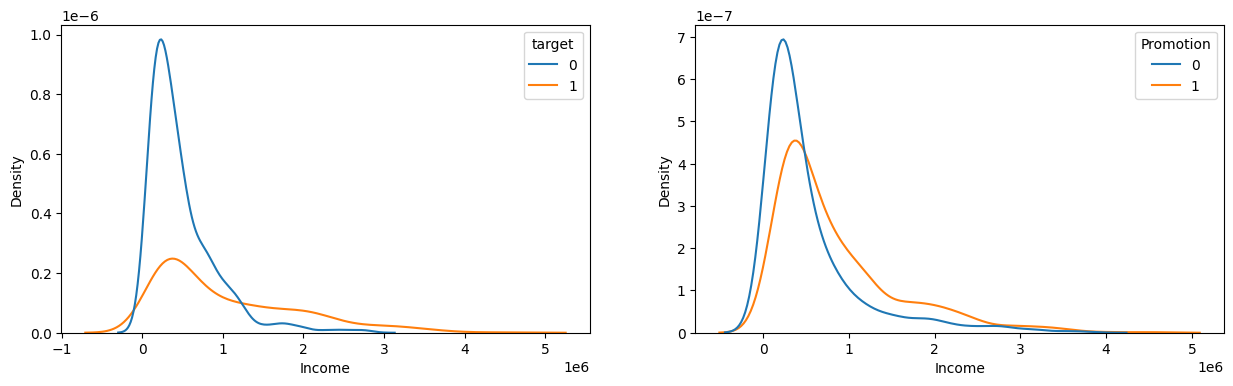

In [62]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.kdeplot(x=df.Income,hue=df['target'])
plt.subplot(1,2,2)
sns.kdeplot(x=df.Income,hue=df['Promotion'])
plt.show()

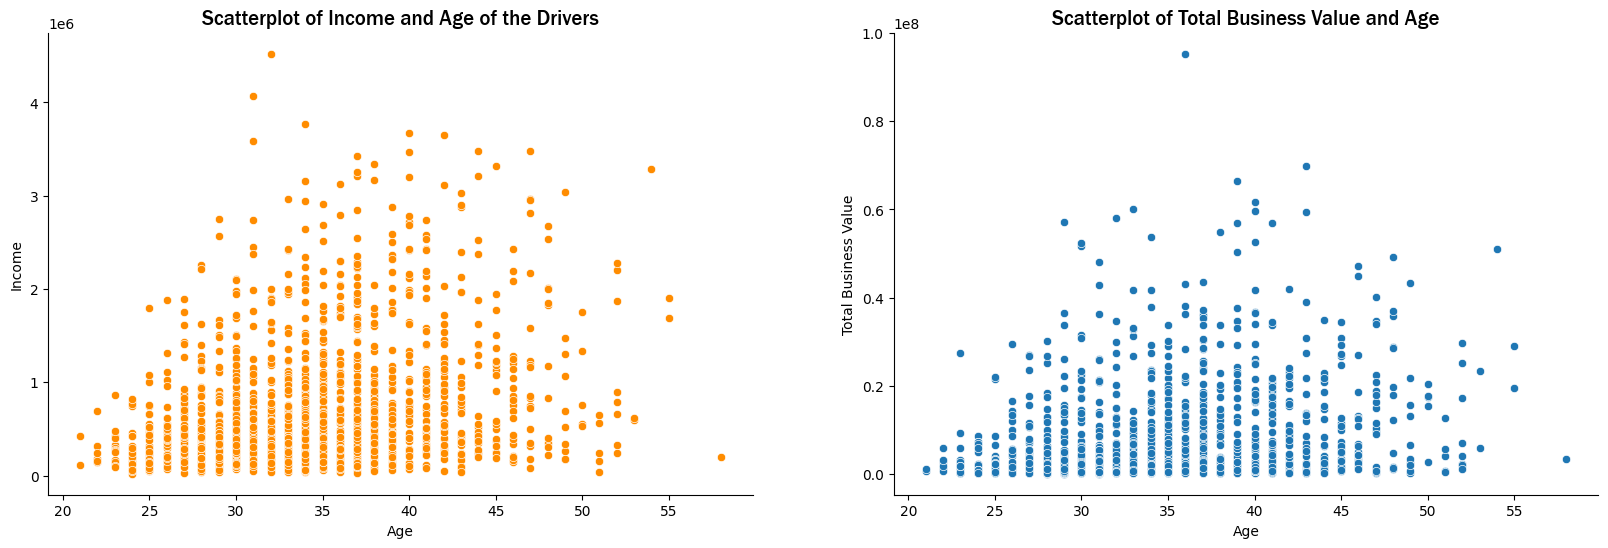

In [63]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(x=df.Age,y=df.Income,color='darkorange')
plt.title('Scatterplot of Income and Age of the Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(1,2,2)
sns.scatterplot(x=df.Age,y=df['Total Business Value'])
plt.title('Scatterplot of Total Business Value and Age',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

**Conclusion:**
* Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.
* Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.

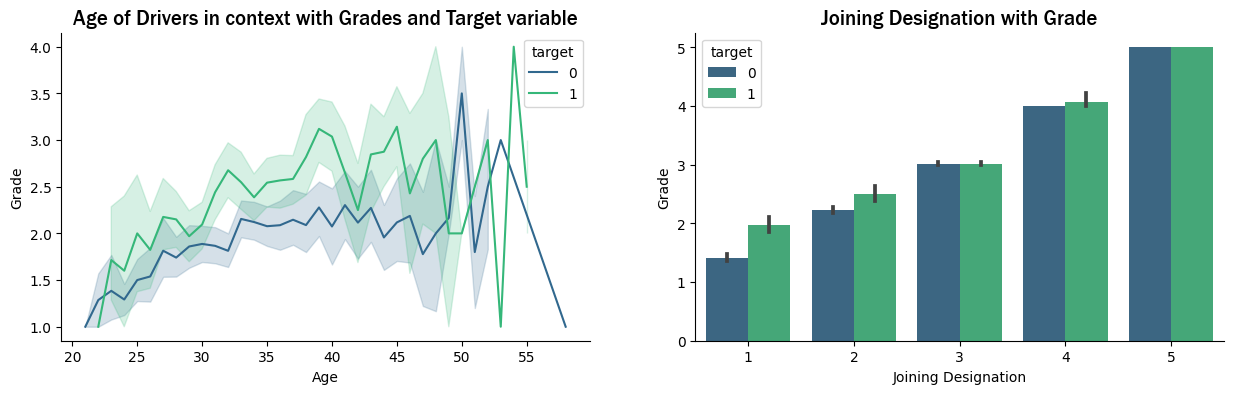

In [64]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,2,1)
sns.lineplot(x=df.Age,y=df.Grade,hue=df.target,palette='viridis')
plt.title('Age of Drivers in context with Grades and Target variable',fontname='Franklin Gothic Medium', fontsize=15)

ax = fig.add_subplot(1,2,2)
sns.barplot(data=df, x="Joining Designation", y="Grade",palette='viridis',hue='target')
plt.title('Joining Designation with Grade',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

* Joining Designation Increases with increase in Grade.

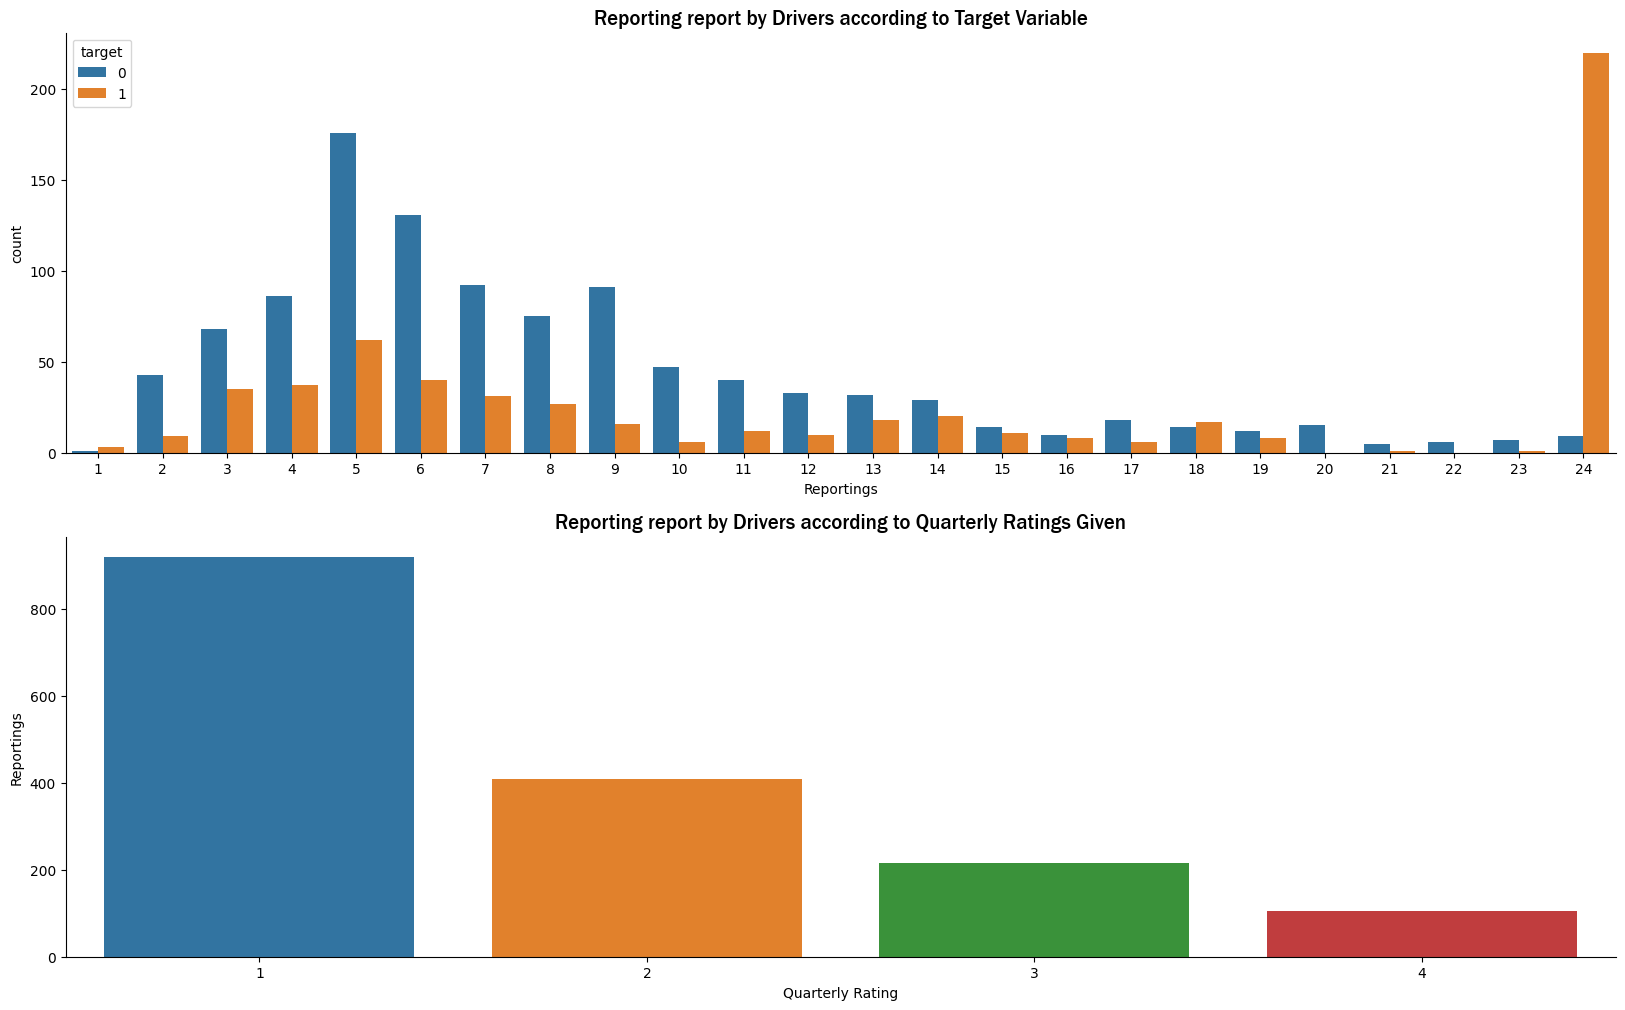

In [65]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
sns.countplot(x=df['Reportings'],hue=df.target)
plt.title('Reporting report by Drivers according to Target Variable',fontname='Franklin Gothic Medium', fontsize=15)

plt.subplot(2,1,2)
grouped_rating = df.groupby('Quarterly Rating')['Reportings'].count().reset_index()
sns.barplot(data = grouped_rating,y='Reportings',x='Quarterly Rating')
plt.title('Reporting report by Drivers according to Quarterly Ratings Given',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

**Conclusion:**
* Max reporting days is 24 days.
* About 55% of the reportings of the employees has got Quarlerly Rating 1.

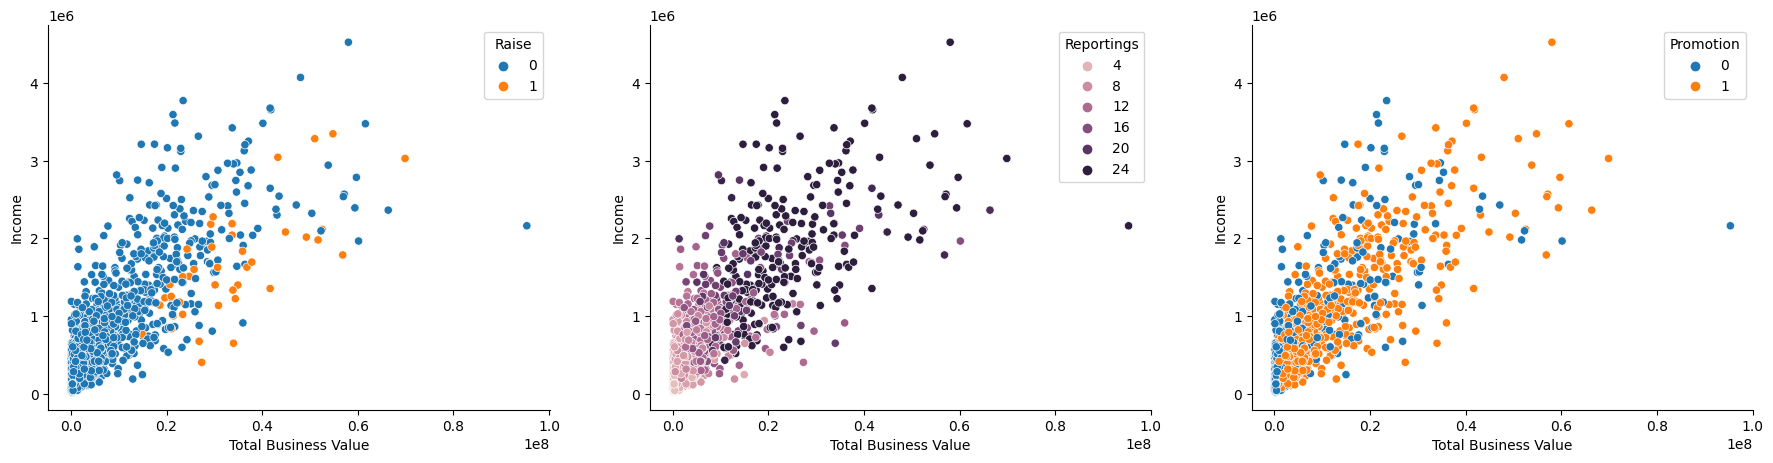

In [66]:
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df['Total Business Value'],y=df.Income,hue=df.Raise)
plt.subplot(1,3,2)
sns.scatterplot(x=df['Total Business Value'],y=df.Income,hue=df.Reportings)
plt.subplot(1,3,3)
sns.scatterplot(x=df['Total Business Value'],y=df.Income,hue=df.Promotion)
sns.despine()
plt.show()

**Conclusion:**
* Number of reportings increases with increase in Income as well as Total Business Value.

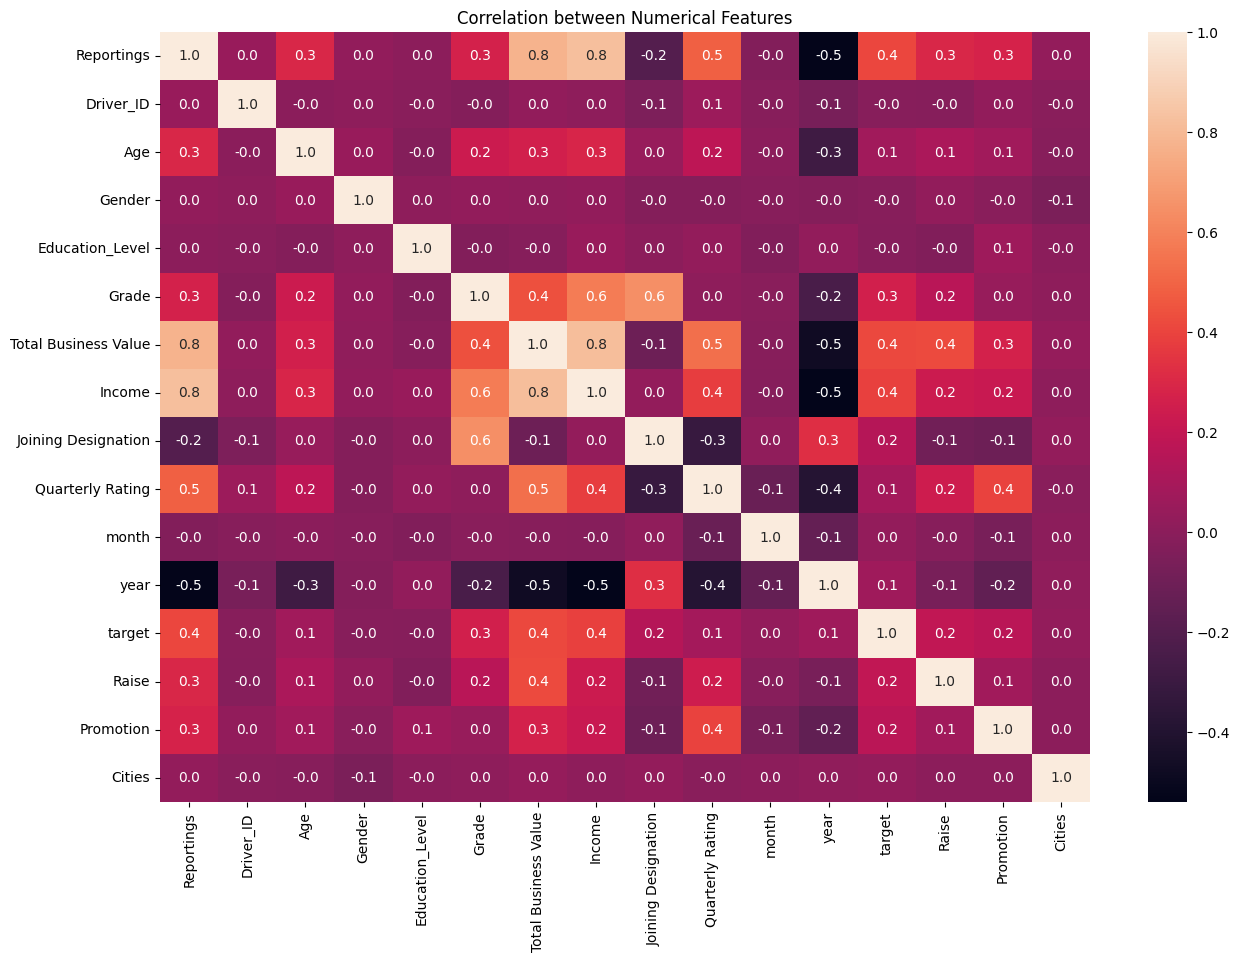

In [67]:
#Correlation between numerical features
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt=".1f")
plt.title('Correlation between Numerical Features')
plt.show()

## Ensemble learning

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay,
                             f1_score, recall_score, precision_recall_curve,
                             precision_score, RocCurveDisplay, average_precision_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Train-Test Split

In [69]:
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [70]:
print(f'Shape of x_train: {X_train.shape}')
print(f'Shape of x_test: {X_test.shape}')

Shape of x_train: (1321, 15)
Shape of x_test: (331, 15)


In [71]:
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of y_train: (1321,)
Shape of y_test: (331,)


## Logistic Regression

In [72]:
#Initialising object of Class LinearRegression()
model = LogisticRegression()    # training LinearRegression model 
model.fit(X_train,y_train)

LogisticRegression()

In [73]:
predictions = model.predict(X_test)
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       207
           1       0.77      0.37      0.50       124

    accuracy                           0.72       331
   macro avg       0.74      0.65      0.65       331
weighted avg       0.73      0.72      0.69       331



In [74]:
# model.coef_[0]
pd.Series((zip(X.columns, model.coef_[0])))

0               (Reportings, 1.0134385160740076e-07)
1                 (Driver_ID, -8.54846070462366e-05)
2                     (Age, -1.2905703386145379e-05)
3                  (Gender, -2.1053824215102185e-07)
4          (Education_Level, -4.017845332616316e-07)
5                    (Grade, -8.489114635038955e-08)
6     (Total Business Value, 1.0711198496150669e-07)
7                   (Income, 2.5205592749856734e-07)
8       (Joining Designation, 6.335743681384692e-07)
9         (Quarterly Rating, -1.399853966974797e-06)
10                  (month, -1.6766034067654838e-06)
11                    (year, -0.0006508366149907002)
12                    (Raise, 3.681122397707675e-08)
13               (Promotion, 2.2218742635693935e-08)
14                 (Cities, -3.2997198671441257e-06)
dtype: object

## One Hot Encoding of Categorical Features

In [75]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = X.select_dtypes('category').columns
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(X[cat_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))
x = pd.concat([X,encoded_df], axis=1)
x.drop(columns=cat_cols, inplace=True)
x.head()

,Reportings,Driver_ID,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,Raise,Promotion,Cities
0,3.0,1.0,28.0,0.0,2.0,1.0,1715580.0,172161.0,1.0,2.0,12.0,2018.0,0.0,0.0,23.0
2,5.0,4.0,43.0,0.0,2.0,2.0,350000.0,328015.0,2.0,1.0,12.0,2019.0,0.0,0.0,13.0
3,3.0,5.0,29.0,0.0,0.0,1.0,120360.0,139104.0,1.0,1.0,1.0,2019.0,0.0,0.0,9.0
4,5.0,6.0,31.0,1.0,1.0,3.0,1265000.0,393640.0,3.0,1.0,7.0,2020.0,0.0,1.0,11.0
7,6.0,12.0,35.0,0.0,2.0,1.0,2607180.0,168696.0,1.0,4.0,6.0,2019.0,0.0,1.0,23.0


In [76]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-0.61446611, -1.09640018,  1.70794584, ..., -0.16737851,
         1.023749  , -0.04979913],
       [ 1.93718866, -1.32951199,  1.54780698, ..., -0.16737851,
        -0.97680193, -0.5247786 ],
       [-0.18919032, -1.0914666 ,  0.26669606, ..., -0.16737851,
         1.023749  ,  1.25639439],
       ...,
       [-0.75622471,  0.03585718, -1.49483144, ..., -0.16737851,
        -0.97680193, -0.88101319],
       [ 0.51960268,  1.32105562, -1.33469258, ..., -0.16737851,
         1.023749  , -1.59348238],
       [-0.33094892,  0.60815284, -0.69413712, ..., -0.16737851,
        -0.97680193, -0.28728886]])

In [77]:
from sklearn.model_selection import cross_validate
valid1 = cross_val_score(LogisticRegression(),X,y,cv=5)
print('Logistic Regression:',valid1.round(2))
print('Mean:',valid1.mean())
valid2 = cross_val_score( DecisionTreeClassifier(),X,y,cv=5)
print('Decision Tree:',valid2.round(3))
print('Mean:',valid2.mean())
valid3 = cross_val_score(RandomForestClassifier(),X,y,cv=5)
print('RandomForestClassifier():',valid3.round(2))
print('Mean:',valid3.mean())
valid4 = cross_val_score(GradientBoostingClassifier(),X,y,cv=5)
print('GradientBoostingClassifier:',valid4.round(3))
print('Mean:',valid4.mean())
valid5 =cross_val_score(XGBClassifier(),X,y,cv=5)
print('XGBoostClassifier:',valid1.round(2))
print('Mean:',valid5.mean())

Logistic Regression: [0.7  0.75 0.75 0.75 0.76]
Mean: 0.7415453629955141
Decision Tree: [0.894 0.879 0.873 0.885 0.861]
Mean: 0.878319143092557
RandomForestClassifier(): [0.93 0.94 0.91 0.91 0.92]
Mean: 0.9212926851597546
GradientBoostingClassifier: [0.931 0.937 0.909 0.909 0.909]
Mean: 0.9188684427355123
XGBoostClassifier: [0.7  0.75 0.75 0.75 0.76]
Mean: 0.9243138331960085


## Machine Learning Model

In [78]:
# Random Forest Classifier
rf = RandomForestClassifier(criterion='gini',max_depth=7,max_features='sqrt',n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=10)

In [79]:
y_pred = rf.predict(X_test)
proba = rf.predict_proba(X_test)[:,1]
print("Train data accuracy:",rf.score(X_train, y_train))
print("Test data accuracy:",rf.score(X_test,y_test))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))

Train data accuracy: 0.9507948523845572
Test data accuracy: 0.8942598187311178
Accuracy of the model: 0.8942598187311178
ROC-AUC score test dataset:  0.9511259155368552


In [80]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       207
           1       0.89      0.82      0.85       124

    accuracy                           0.89       331
   macro avg       0.89      0.88      0.89       331
weighted avg       0.89      0.89      0.89       331



## Confusion Matrix

[[194  13]
 [ 22 102]]


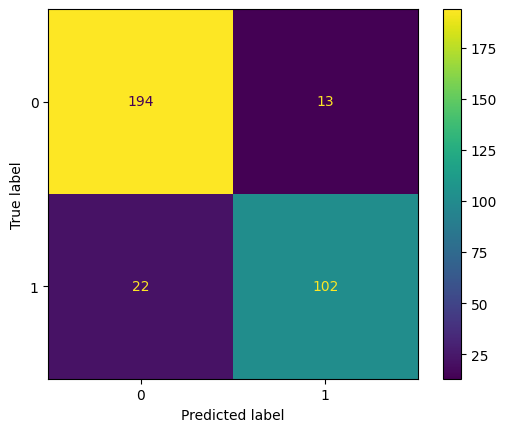

In [81]:
cm1=confusion_matrix(y_test,y_pred)
print(cm1)
ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=rf.classes_).plot()

In [82]:
rf_clf_imp1 = rf.feature_importances_

## XG Boosting Classifier

In [83]:
gbc1 = GradientBoostingClassifier()
gbc1.fit(X_train, y_train)
y_pred = gbc1.predict(X_test)
proba =gbc1.predict_proba(X_test)[:, 1]

In [84]:
gbc_clf_imp1 = gbc1.feature_importances_

In [85]:
print('Train Score : ', gbc1.score(X_train, y_train))
print('Test Score : ', gbc1.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))

Train Score :  0.9704769114307343
Test Score :  0.918429003021148
Accuracy Score :  0.918429003021148
ROC-AUC score test dataset:  0.9589956365903071


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       207
           1       0.89      0.90      0.89       124

    accuracy                           0.92       331
   macro avg       0.91      0.91      0.91       331
weighted avg       0.92      0.92      0.92       331



[[193  14]
 [ 13 111]]


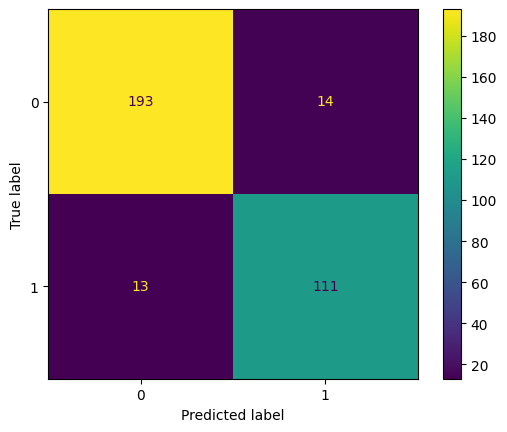

In [87]:
cm2=confusion_matrix(y_test,y_pred)
print(cm2)
ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=gbc1.classes_).plot()

## Class Imbalance Treatment

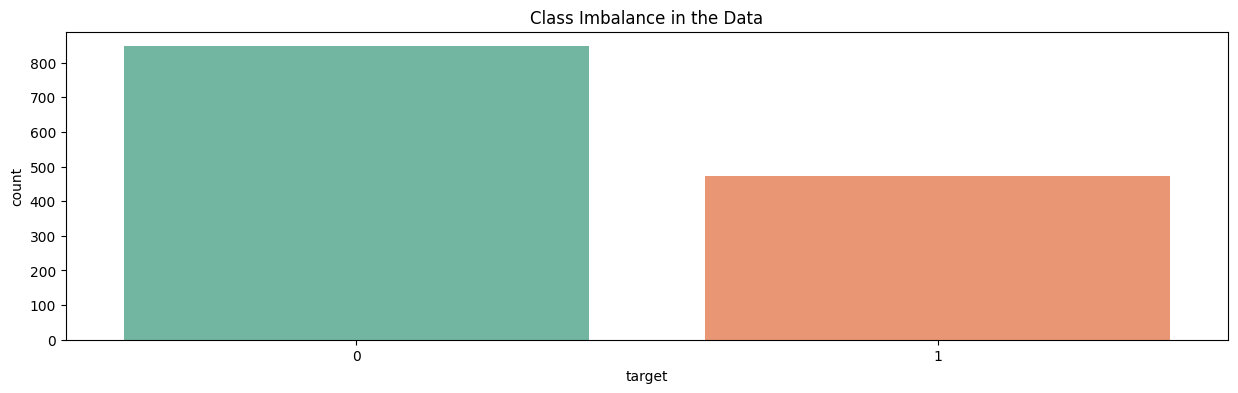

In [88]:
plt.figure(figsize=(15,4))
sns.countplot(x=y_train,palette='Set2')
plt.title('Class Imbalance in the Data')
plt.show()

In [89]:
(y_train.value_counts()*100)/len(y_train)

0    64.118092
1    35.881908
Name: target, dtype: float64

In [90]:
from imblearn.over_sampling import SMOTE
smot = SMOTE(random_state=42)
X_train_smot,y_train_smot = smot.fit_resample(X_train,y_train.ravel())

In [91]:
print(f'Shape of x_train: {X_train_smot.shape}')
print(f'Shape of x_test: {X_test.shape}')

Shape of x_train: (1694, 15)
Shape of x_test: (331, 15)


In [92]:
print(f'Shape of y_train: {y_train_smot.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of y_train: (1694,)
Shape of y_test: (331,)


In [93]:
from collections import Counter
c = Counter(y_train_smot)
print(c)

Counter({0: 847, 1: 847})


## Random Forest Classifier

In [94]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_smot,y_train_smot)

RandomForestClassifier()

In [95]:
rf_clf = RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators= 19)
rf_clf.fit(X_train_smot,y_train_smot)

RandomForestClassifier(max_depth=8, n_estimators=19)

In [96]:
rf_clf_imp2=rf_clf.feature_importances_

In [97]:
y_pred = rf_clf.predict(X_test)
proba = rf_clf.predict_proba(X_test)[:,1]
print("Train data accuracy:",rf_clf.score(X_train, y_train))
print("Test data accuracy:",rf_clf.score(X_test,y_test))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))

Train data accuracy: 0.9651778955336866
Test data accuracy: 0.8821752265861027
Accuracy of the model: 0.8821752265861027
ROC-AUC score test dataset:  0.9395356085398162


In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       207
           1       0.80      0.91      0.85       124

    accuracy                           0.88       331
   macro avg       0.87      0.89      0.88       331
weighted avg       0.89      0.88      0.88       331



[[179  28]
 [ 11 113]]


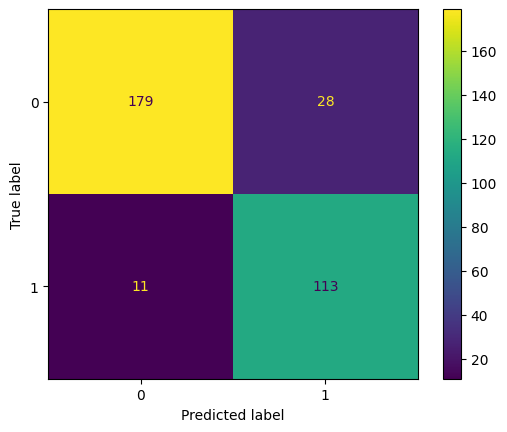

In [99]:
cm3=confusion_matrix(y_test,y_pred)
print(cm3)
ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=rf_clf.classes_).plot()

## Gradient Boosting

In [100]:
gbc2 = GradientBoostingClassifier()
gbc2.fit(X_train_smot, y_train_smot)
y_pred1 = gbc2.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       207
           1       0.84      0.90      0.87       124

    accuracy                           0.90       331
   macro avg       0.89      0.90      0.90       331
weighted avg       0.90      0.90      0.90       331



In [101]:
gbc_clf_imp2 = gbc2.feature_importances_

[[186  21]
 [ 12 112]]


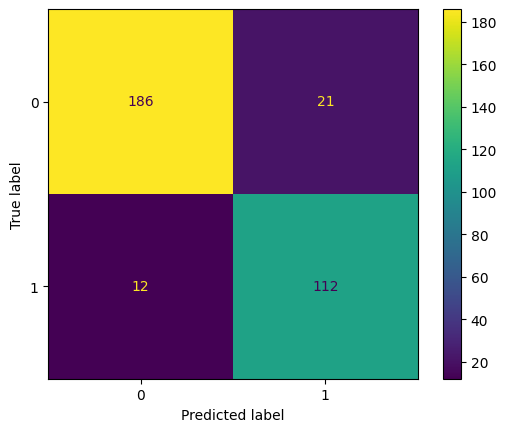

In [102]:
cm4=confusion_matrix(y_test,y_pred1)
print(cm4)
ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=gbc2.classes_).plot()

In [103]:
data1 = pd.DataFrame({'Column_Name':X.columns,
                    'RandomForestClassifier':rf_clf_imp1,
                    'XGBClassifier':gbc_clf_imp1})
data1

,Column_Name,RandomForestClassifier,XGBClassifier
0,Reportings,0.224529,0.391298
1,Driver_ID,0.025841,0.008175
2,Age,0.028662,0.005785
3,Gender,0.002997,0.000527
4,Education_Level,0.005954,0.000080
5,Grade,0.017067,0.002119
6,Total Business Value,0.123392,0.099514
7,Income,0.154728,0.023946
8,Joining Designation,0.041630,0.003108
9,Quarterly Rating,0.082160,0.008600


In [104]:
data2 = pd.DataFrame({'Column_Name':X.columns,
                    'RandomForestClassifier':rf_clf_imp2,
                    'XGBClassifier':gbc_clf_imp2})
data2

,Column_Name,RandomForestClassifier,XGBClassifier
0,Reportings,0.179918,0.256746
1,Driver_ID,0.028432,0.007620
2,Age,0.041870,0.006710
3,Gender,0.012411,0.006807
4,Education_Level,0.014206,0.003721
5,Grade,0.024058,0.005191
6,Total Business Value,0.176874,0.196760
7,Income,0.134992,0.024653
8,Joining Designation,0.021441,0.003045
9,Quarterly Rating,0.048033,0.026927


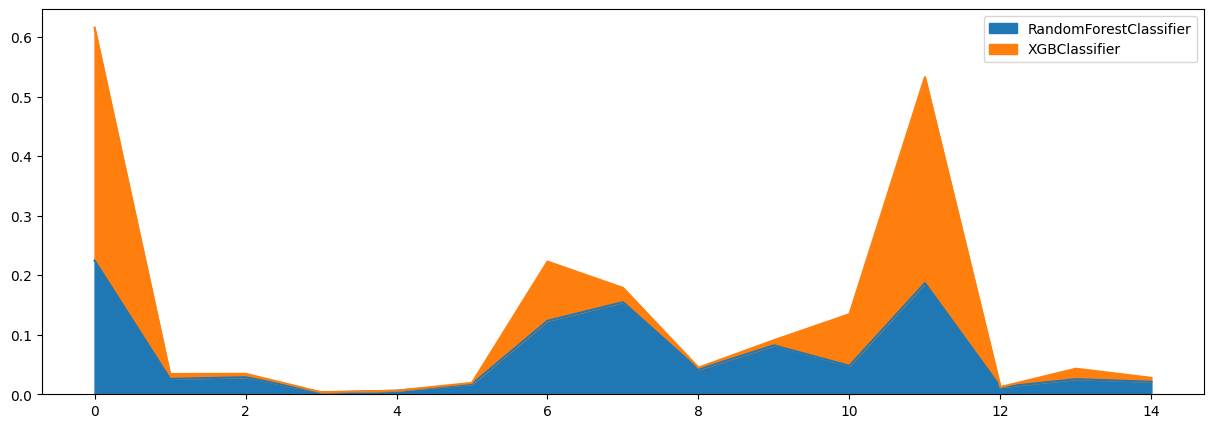

In [105]:
data1.plot(kind="area", figsize = (15,5))
plt.show()

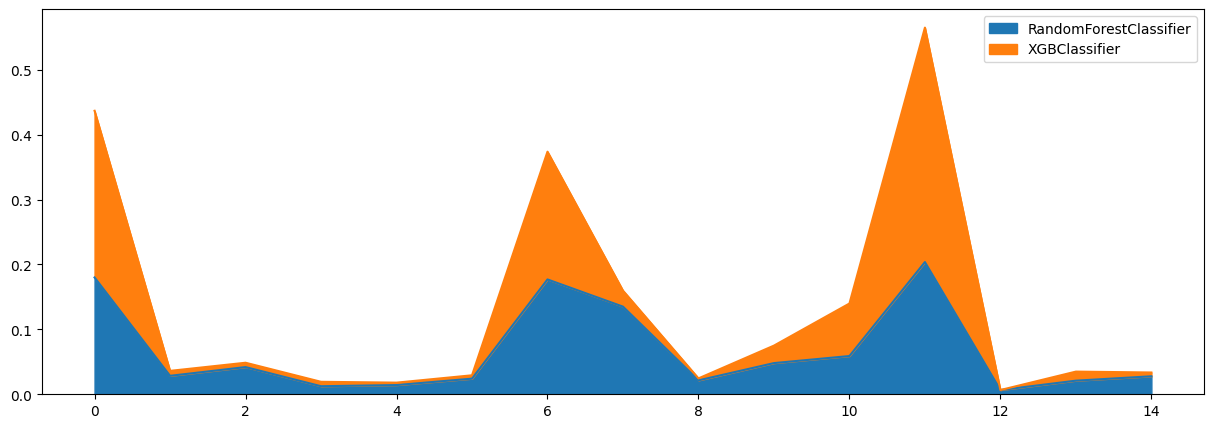

In [106]:
data2.plot(kind="area", figsize = (15,5))
plt.show()

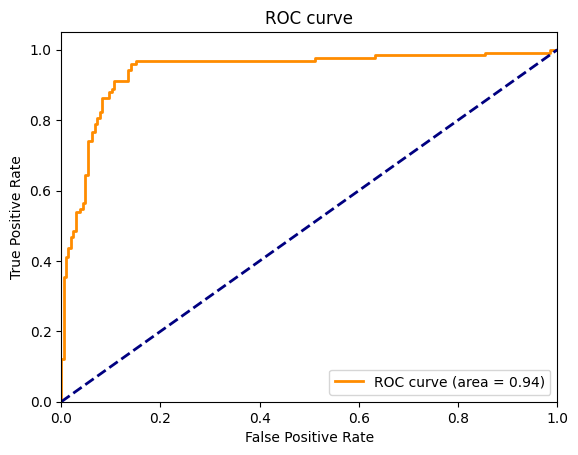

In [107]:
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, proba)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

* The ROC AUC of 0.94 signifies that the model is able to discriminate well between the positive and the negative class.
* But it is not a good measure for an imbalanced target variable because it may be high even when the classifier has a poor score on the minority class.
* This can happen when the classifier performs well on the majority class instances, which dominate the dataset. As a result, the AUC may appear high, but the model may not effectively identify the minority class instances.

In [108]:
def plot_pre_curve(y_test,proba):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_test, proba)
    # Area under Precision Recall Curve
    auprc = average_precision_score(y_test, proba)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    plt.plot(recall, precision, marker='.',label='PR curve (area = %0.2f)' % auprc)
    plt.title("Precision Recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="lower left")
    plt.show()

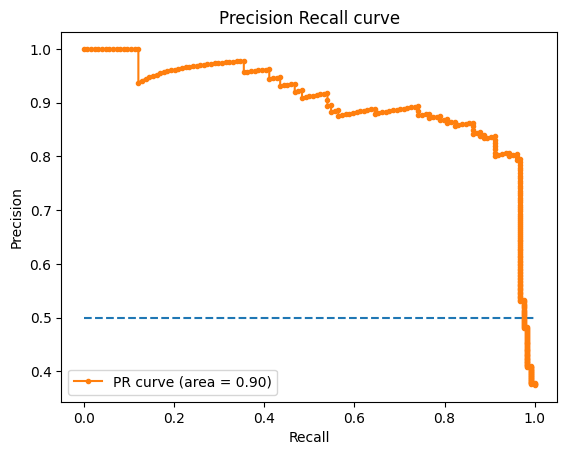

In [109]:
plot_pre_curve(y_test , proba)

In [110]:
# calculating precision, reall and f1_score for every
tp1,fp1,fn1,tn1 =cm1[0][0],cm1[0][1],cm1[1][0],cm1[1][1]
tp2,fp2,fn2,tn2 =cm2[0][0],cm2[0][1],cm2[1][0],cm2[1][1]
tp3,fp3,fn3,tn3 =cm3[0][0],cm3[0][1],cm3[1][0],cm3[1][1]
tp4,fp4,fn4,tn4 =cm4[0][0],cm4[0][1],cm4[1][0],cm4[1][1]
precision1 = tp1/(tp1+fp1)
recall1 = tp1/(tp1+fn1)
precision2 = tp2/(tp2+fp2)
recall2 = tp2/(tp2+fn2)
precision3 = tp3/(tp3+fp3)
recall3 = tp3/(tp3+fn3)
precision4 = tp4/(tp4+fp4)
recall4 = tp4/(tp4+fn4)
f1_1 = (2*precision1*recall1)/(precision1+recall1)
f1_2 = (2*precision2*recall2)/(precision2+recall2)
f1_3 = (2*precision3*recall3)/(precision3+recall3)
f1_4 =(2*precision4*recall4)/(precision4+recall4)

In [111]:
df = pd.DataFrame({'Model':['RandomForest','GradientBoosting','RandomForest','GradientBoosting'],
                  'Class':['Imbalanced','Imbalanced','Balanced','Balanced'],
                  'True_pos':[tp1,tp2,tp3,tp4],
                  'Fal_pos':[fp1,fp2,fp3,fp4],
                  'Fal_neg':[fn1,fn2,fn3,fn4],
                  'True_neg':[tn1,tn2,tn3,tn4],
                  'F1_score%':[f1_1*100,f1_2*100,f1_3*100,f1_4*100],
                  'Precision%':[precision1*100,precision2*100,precision3*100,precision4*100],
                  'Recall%':[recall1*100,recall2*100,recall3*100,recall4*100]})

In [112]:
df

,Model,Class,True_pos,Fal_pos,Fal_neg,True_neg,F1_score%,Precision%,Recall%
0,RandomForest,Imbalanced,194,13,22,102,91.725768,93.719807,89.814815
1,GradientBoosting,Imbalanced,193,14,13,111,93.462470,93.236715,93.689320
2,RandomForest,Balanced,179,28,11,113,90.176322,86.473430,94.210526
3,GradientBoosting,Balanced,186,21,12,112,91.851852,89.855072,93.939394


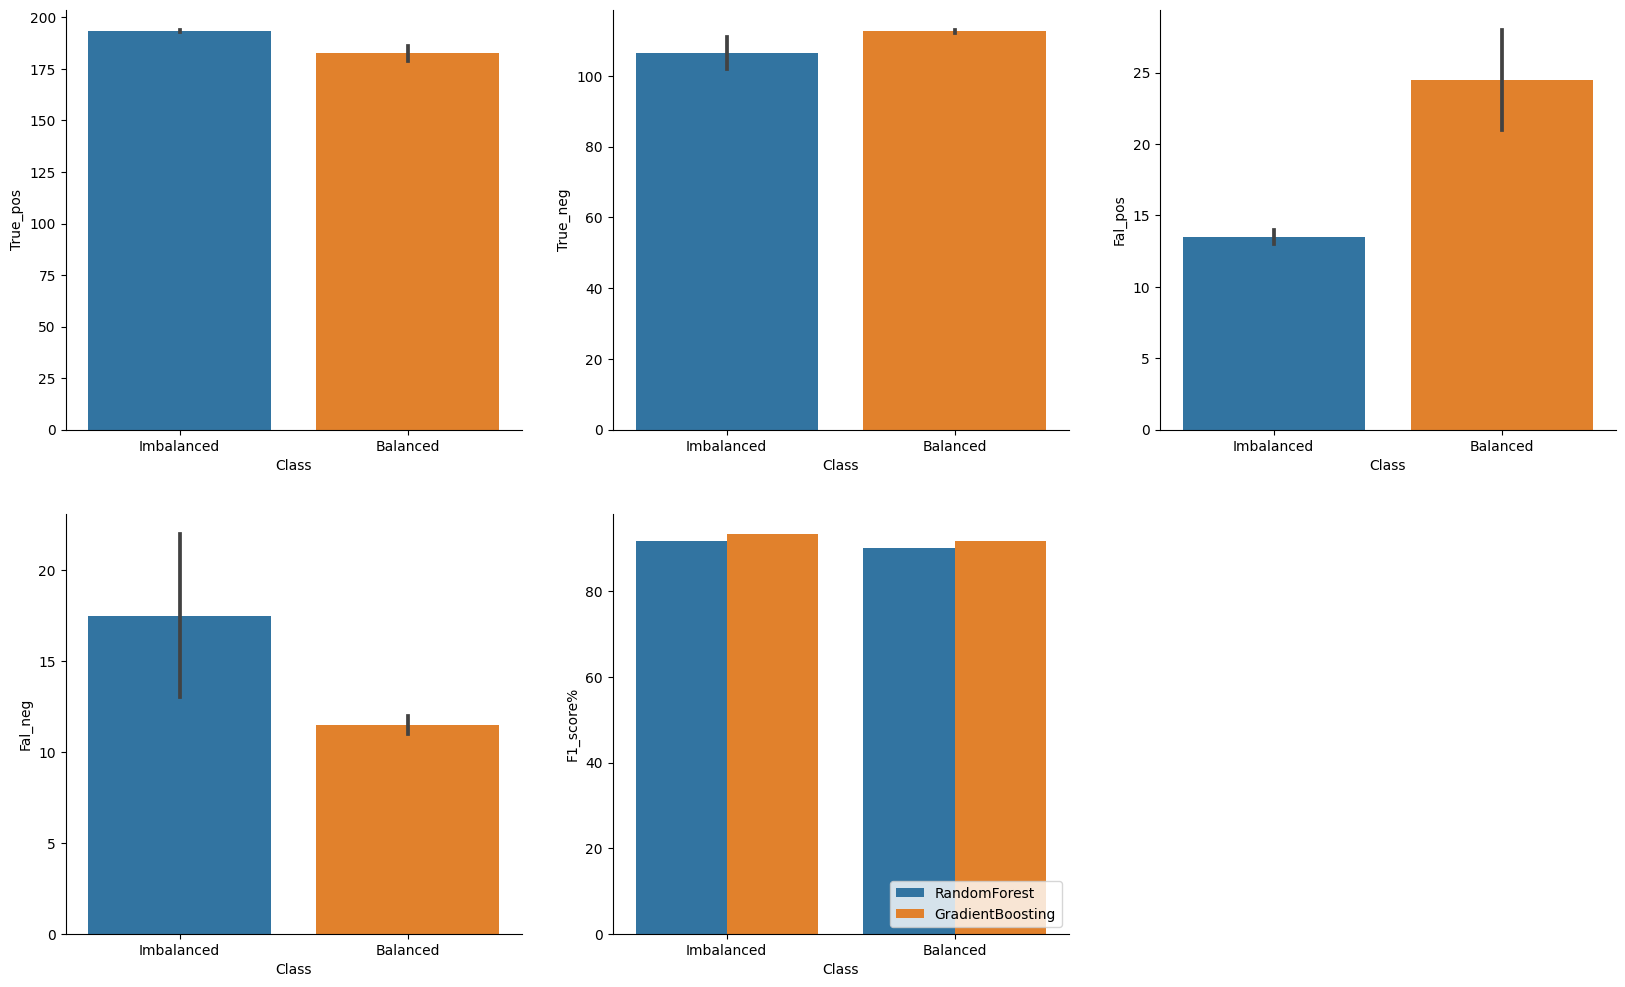

In [113]:
# Representation of True Positives, True Negatives, False Positives, False Negatives and F1_score of all the Models
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.barplot(x=df.Class,y=df.True_pos)

plt.subplot(2,3,2)
sns.barplot(x=df.Class,y=df.True_neg)

plt.subplot(2,3,3)
sns.barplot(x=df.Class,y=df.Fal_pos)

plt.subplot(2,3,4)
sns.barplot(x=df.Class,y=df.Fal_neg)

plt.subplot(2,3,5)
sns.barplot(x=df.Class,y=df['F1_score%'],hue=df.Model)
plt.legend(loc='lower right')
sns.despine()
plt.show()

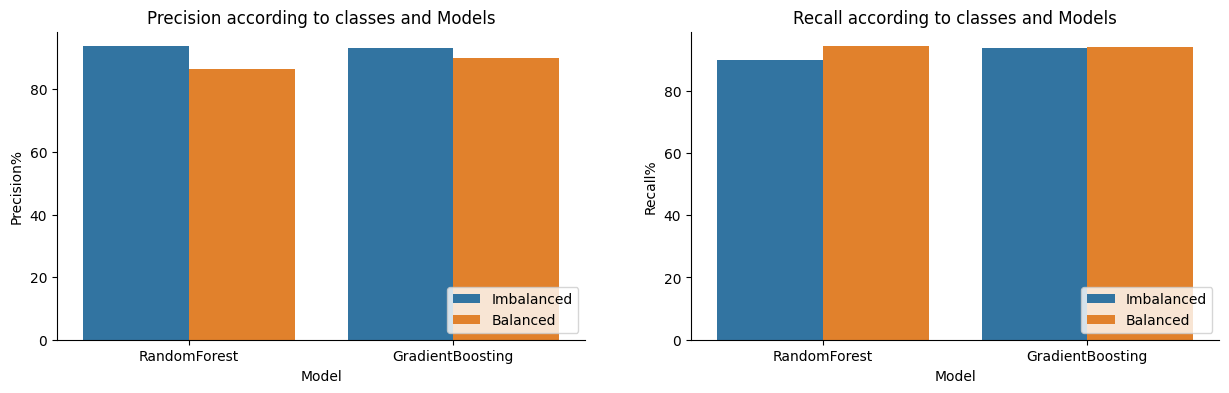

In [114]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x=df.Model,y=df['Precision%'],hue=df.Class)
plt.title('Precision according to classes and Models')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
sns.barplot(x=df.Model,y=df['Recall%'],hue=df.Class)
plt.title('Recall according to classes and Models')
plt.legend(loc='lower right')
sns.despine()
plt.show()

## Insights
* Male drivers constitute 58.9% of the total driver population.
* There are three education levels among drivers, all of which have nearly equal distributions within the driver community.
* The most frequent grade attained by drivers is Grade 2, with a declining count as the grade level increases.
* The majority of drivers fall between 21 and 58 years old, with 32 years being the most common age. Specifically, the peak number of drivers occurs within the age range of 31 to 41 years.
* The highest number of drivers prefer City C20 over other locations.
* Majority number of reporting of drivers prefer R6 over other number of reporting.
* July received the maximum number of drivers in 8 years.
* February and March receives the least number of Drivers joining OLA.
* Joining of Drivers receives a boost of about 500% after 2017.
* So we see that there are 57% male employees and 43% female employees.
* The percentages of employees with different education levels are almost same for level 1 & 2.
* 97.3% of the employees who did not get a raise.
* Almost 43% of the employees joined at lowest designation 1. 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.
* Only 54.6% of the employees received a promotion, while 45.4% did not. However, only 2.6% received a raise in income.
* Number of employees has been increase with increase in year as well as number of reporting.
* The number of male employees found in reporting is more than women employees.
* Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.
* Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.
* Income decreases with increase in Destination as about 4% of the employees hold higher designations.
* The median of the Income for employees having higher Grades is greater.
* Distribution of Income for employees at different Education level is about a change of 3-5% with level 0.
* The ROC AUC of 0.94 signifies that the model is able to discriminate well between the positive and the negative class.
* But it is not a good measure for an imbalanced target variable because it may be high even when the classifier has a poor score on the minority class.
* This can happen when the classifier performs well on the majority class instances, which dominate the dataset. As a result, the AUC may appear high, but the model may not effectively identify the minority class instances.
* Joining Designation Increases with increase in Grade.
* Top reporting days is 24 days.
* About 55% of the reporting of the employees has got quarterly Rating 1.
* Number of reporting increases with increase in Income as well as Total Business Value.
* Recall increased after treatment of data imbalance and is performing better in Gradient Boosting.
* Precision dropped after treatment of data imbalance and is performing better in Random Forest.
* F1_score increased after the treatment of imbalanced data and in Gradient Boosting.